# Artificial Intelligence Predictions in Cyber Security: Analysis and Early Detection of Cyber Attacks


# Install Dataset

In [1]:
from google.colab import userdata
import json

!mkdir -p ~/.kaggle
key = userdata.get("KAGGLE_KEY")
user_name = userdata.get("KAGGLE_USERNAM")

api_token = {
    "username":user_name,
    "key":key,
}

with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)

!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d mrwellsdavid/unsw-nb15


Dataset URL: https://www.kaggle.com/datasets/mrwellsdavid/unsw-nb15
License(s): unknown
 97% 145M/149M [00:02<00:00, 56.4MB/s]
100% 149M/149M [00:02<00:00, 58.6MB/s]


In [2]:
!unzip unsw-nb15.zip -d cyber

Archive:  unsw-nb15.zip
  inflating: cyber/NUSW-NB15_features.csv  
  inflating: cyber/UNSW-NB15_1.csv   
  inflating: cyber/UNSW-NB15_2.csv   
  inflating: cyber/UNSW-NB15_3.csv   
  inflating: cyber/UNSW-NB15_4.csv   
  inflating: cyber/UNSW-NB15_LIST_EVENTS.csv  
  inflating: cyber/UNSW_NB15_testing-set.csv  
  inflating: cyber/UNSW_NB15_training-set.csv  


# Data Analysis

In [3]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [65]:
df_UNSW_NB15_test = pd.read_csv("/content/cyber/UNSW_NB15_testing-set.csv",low_memory=False)
df_UNSW_NB15_train = pd.read_csv("/content/cyber/UNSW_NB15_training-set.csv",low_memory=False)
frames =[df_UNSW_NB15_train,df_UNSW_NB15_test]
df_UNSW_NB15 = pd.concat(frames)
df_UNSW_NB15.head()

id       dur proto service state  spkts  dpkts  sbytes  dbytes  \
0   1  0.000011   udp       -   INT      2      0     496       0   
1   2  0.000008   udp       -   INT      2      0    1762       0   
2   3  0.000005   udp       -   INT      2      0    1068       0   
3   4  0.000006   udp       -   INT      2      0     900       0   
4   5  0.000010   udp       -   INT      2      0    2126       0   

          rate  ...  ct_dst_sport_ltm  ct_dst_src_ltm  is_ftp_login  \
0   90909.0902  ...                 1               2             0   
1  125000.0003  ...                 1               2             0   
2  200000.0051  ...                 1               3             0   
3  166666.6608  ...                 1               3             0   
4  100000.0025  ...                 1               3             0   

   ct_ftp_cmd  ct_flw_http_mthd  ct_src_ltm  ct_srv_dst  is_sm_ips_ports  \
0           0                 0           1           2                0   
1           0                 0           1           2                0   
2           0                 0           1           3                0   
3           0                 0           2           3                0   
4           0                 0           2           3                0   

   attack_cat  label  
0      Normal      0  
1      Normal      0  
2      Normal      0  
3      Normal      0  
4      Normal      0  

[5 rows x 45 columns]

In [5]:
df_UNSW_NB15.shape

(257673, 45)

In [6]:
df_UNSW_NB15.isnull().sum()

id                   0
dur                  0
proto                0
service              0
state                0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sttl                 0
dttl                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_srv_src           0
ct_state_ttl         0
ct_dst_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
ct_src_ltm           0
ct_srv_dst           0
is_sm_ips_ports      0
attack_cat 

In [7]:
df_UNSW_NB15.describe()

id            dur          spkts          dpkts  \
count  257673.000000  257673.000000  257673.000000  257673.000000   
mean    72811.823858       1.246715      19.777144      18.514703   
std     48929.917641       5.974305     135.947152     111.985965   
min         1.000000       0.000000       1.000000       0.000000   
25%     32210.000000       0.000008       2.000000       0.000000   
50%     64419.000000       0.004285       4.000000       2.000000   
75%    110923.000000       0.685777      12.000000      10.000000   
max    175341.000000      59.999989   10646.000000   11018.000000   

             sbytes        dbytes          rate           sttl           dttl  \
count  2.576730e+05  2.576730e+05  2.576730e+05  257673.000000  257673.000000   
mean   8.572952e+03  1.438729e+04  9.125391e+04     180.000931      84.754957   
std    1.737739e+05  1.461993e+05  1.603446e+05     102.488268     112.762131   
min    2.400000e+01  0.000000e+00  0.000000e+00       0.000000       0.000000   
25%    1.140000e+02  0.000000e+00  3.078928e+01      62.000000       0.000000   
50%    5.280000e+02  1.780000e+02  2.955665e+03     254.000000      29.000000   
75%    1.362000e+03  1.064000e+03  1.250000e+05     254.000000     252.000000   
max    1.435577e+07  1.465753e+07  1.000000e+06     255.000000     254.000000   

              sload  ...  ct_src_dport_ltm  ct_dst_sport_ltm  ct_dst_src_ltm  \
count  2.576730e+05  ...     257673.000000     257673.000000   257673.000000   
mean   7.060869e+07  ...          5.238271          4.032677        8.322964   
std    1.857313e+08  ...          8.160822          5.831515       11.120754   
min    0.000000e+00  ...          1.000000          1.000000        1.000000   
25%    1.231800e+04  ...          1.000000          1.000000        1.000000   
50%    7.439423e+05  ...          1.000000          1.000000        3.000000   
75%    8.000000e+07  ...          4.000000          3.000000        8.000000   
max    5.988000e+09  ...         59.000000         46.000000       65.000000   

        is_ftp_login     ct_ftp_cmd  ct_flw_http_mthd     ct_src_ltm  \
count  257673.000000  257673.000000     257673.000000  257673.000000   
mean        0.012819       0.012850          0.132005       6.800045   
std         0.116091       0.116421          0.681854       8.396266   
min         0.000000       0.000000          0.000000       1.000000   
25%         0.000000       0.000000          0.000000       2.000000   
50%         0.000000       0.000000          0.000000       3.000000   
75%         0.000000       0.000000          0.000000       8.000000   
max         4.000000       4.000000         30.000000      60.000000   

          ct_srv_dst  is_sm_ips_ports          label  
count  257673.000000    257673.000000  257673.000000  
mean        9.121049         0.014274       0.639077  
std        10.874752         0.118618       0.480269  
min         1.000000         0.000000       0.000000  
25%         2.000000         0.000000       0.000000  
50%         4.000000         0.000000       1.000000  
75%        11.000000         0.000000       1.000000  
max        62.000000         1.000000       1.000000  

[8 rows x 41 columns]

## About dataset
* script: Source IP address
* sport: Source port IP
* dstip: Destination IP address
* dsport: Destination port number
* proto:: Transaction protocol
* state: Indicates the state and its dependent protocol, e.g., ACC, CLO, CON, ECO, ECR, FIN, INT,MAS, PAR,...
* dur: Record total duration
* sbytes: Source to destination transaction bytes
* dbytes: Destination to source transaction bytes
* sttl: Source to destination time to live value
* dttl: Destination to source time to live value
* sloss: Source packets retransmitted or dropped
* dloss: Destination packets retransmitted or dropped
* service: http, ftp, smtp, ssh, dns, ftp-data, irc and (-) if not much used service
* Sload: Source bits per second
* Dload: Destination bits per second
* Spkts: Source to destination packet count
* Dpkts: Destination to source packet count
* swin: Source TCP window advertisement value
* dwin: Destination TCP window advertisement value
* stcpb: Source TCP base sequence number
* dtcpb: Destination TCP base sequence number
* smeansz: Mean of the flow packet size transmitted by the source
* dmeansz: Mean of the flow packet size transmitted by the destination
* trans_depth: Represents the pipelined depth into the connection of http request/response transaction
* res_bdy_len: Actual uncompressed content size of the data transferred from the server’s http service
* Sjit: Source jitter (mSec)
* Djit: Destination jitter (mSec)
* Smite: Record start time
* Ltim: Record last time
* Sintpkt: Source interpacket arrival time (mSec)
* Dintpkt: Destination interpacket arrival time (mSec)
* tcprtt: TCP connection setup round-trip time, the sum of ‘synack’ and ‘ackdat’
* synack: TCP connection setup time, the time between the SYN and the SYN_ACK packets
* ackdat: TCP connection setup time, the time between the SYN_ACK and the ACK packets
* is_sm_ips_ports: If source (1) and destination (3) IP addresses equal and port numbers (2)(4) equal then, this variable...
* ct_state_ttl: No. for each state (6) according to specific range of values for source/destination time to live (10...
* ct_flw_http_mthd: No. of flows that has methods such as Get and Post in http service
* is_ftp_login: If the FTP session is accessed by user and password then 1 else 0
* ct_ftp_cmd: No of flows that has a command in FTP session
* ct_srv_src: No. of connections that contain the same service (14) and source address (1) in 100 connections...
* ct_srv_dst: No. of connections that contain the same service (14) and destination address (3) in 100 connections...
* ct_dst_Item: No. of connections of the same destination address (3) in 100 connections according to the last time...
* ct_src_Itm: No. of connections of the same source address (1) in 100 connections according to the last time (26)...
* ct_dtc_dport_Itm: No of connections of the same source address (1) and the destination port (4) in 100 connections acc...
* ct_dst_sport_Itm: No of connections of the same destination address (3) and the source port (2) in 100 connections acc...
* ct_dst_src_Itm: No of connections of the same source (1) and the destination (3) address in 100 connections according...
* attack_cat: The name of each attack category. In this data set, nine categories e.g. Fuzzers, Analysis, Backdoo...
* Label: 0 for normal and 1 for attack records



In [8]:
df_UNSW_NB15["attack_cat"].value_counts()

attack_cat
Normal            93000
Generic           58871
Exploits          44525
Fuzzers           24246
DoS               16353
Reconnaissance    13987
Analysis           2677
Backdoor           2329
Shellcode          1511
Worms               174
Name: count, dtype: int64

In [9]:
df_UNSW_NB15["label"].value_counts()

label
1    164673
0     93000
Name: count, dtype: int64

In [10]:
df_UNSW_NB15.columns

Index(['id', 'dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes',
       'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss',
       'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin',
       'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth',
       'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm',
       'ct_srv_dst', 'is_sm_ips_ports', 'attack_cat', 'label'],
      dtype='object')

## Analyze the Distribution of Data Fields

In [66]:
import seaborn as sns

<ipython-input-67-4a82ffd3d9d3>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


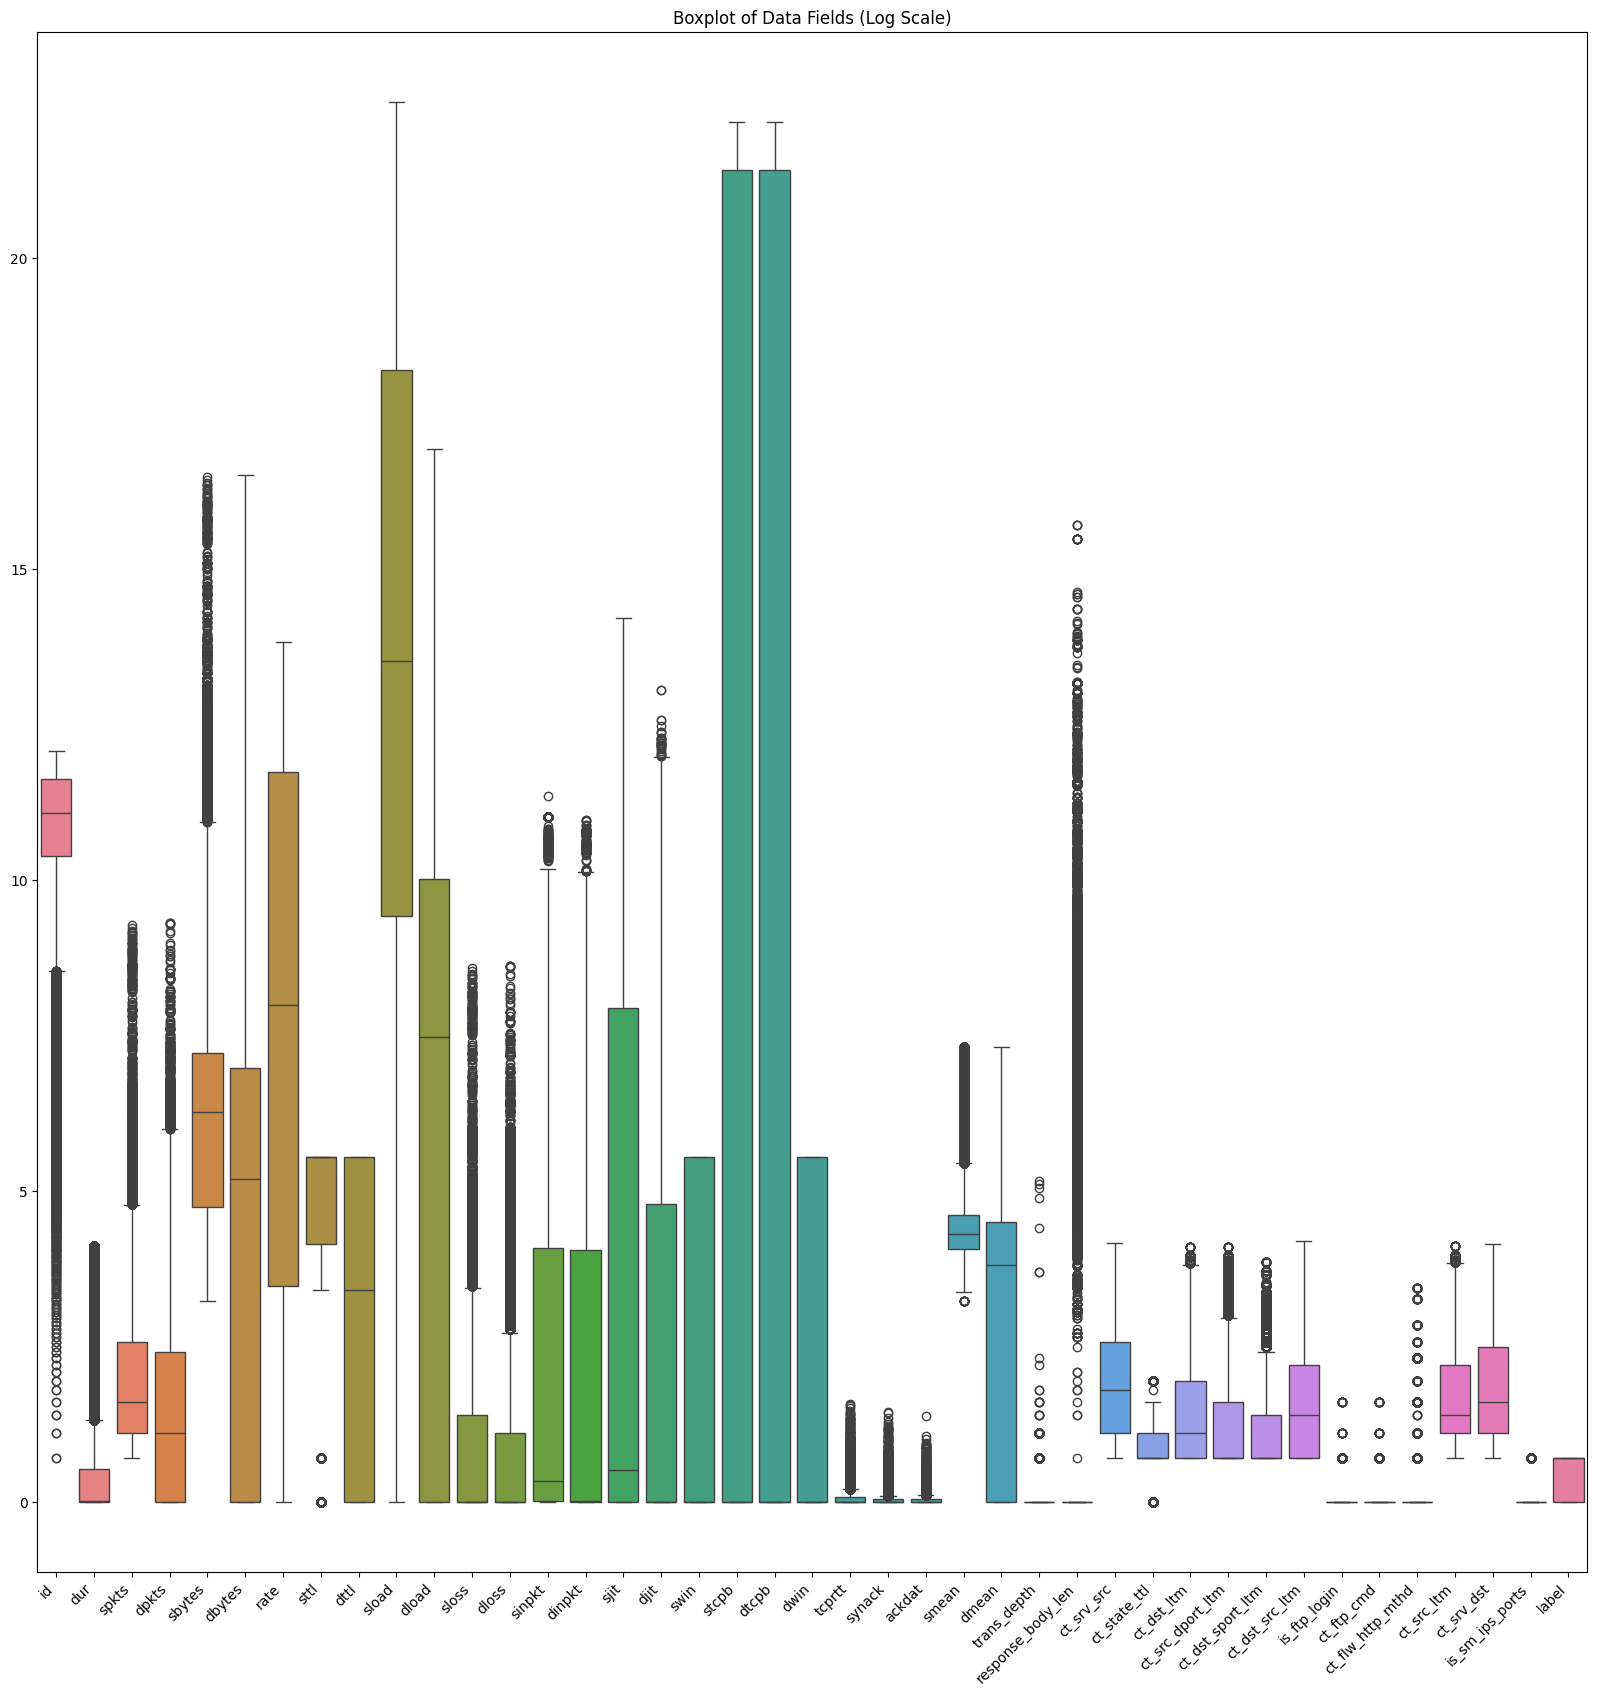

In [67]:
numeric_columns = df_UNSW_NB15.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(20, 20))
ax = sns.boxplot(data=np.log1p(df_UNSW_NB15[numeric_columns]))
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.title('Boxplot of Data Fields (Log Scale)')
plt.show()

* Unusual Network Activity: There may be unusual network activity or network attacks, causing some traffic to have unusual packet numbers, data amounts, or durations.

* Large Transactions: Transactions or connections that can take long periods of time or transfer large amounts of data, creating outliers.

* Error Feed: If the data provided from the source is incorrect or contains errors, it may contain unrealistic values, leading to the occurrence of exceptions.

* Cyber Attacks: Cyber attacks can create unusual behavior in data, such as transmitting large amounts of packets or performing unusual transactions.

* Measurement Bias: If the measurement process is inaccurate or has errors, it can lead to outliers in the data.

* System Problems: Problems in the system or network equipment can also cause outliers, due to the inability to accurately measure or record data.

## Correlation

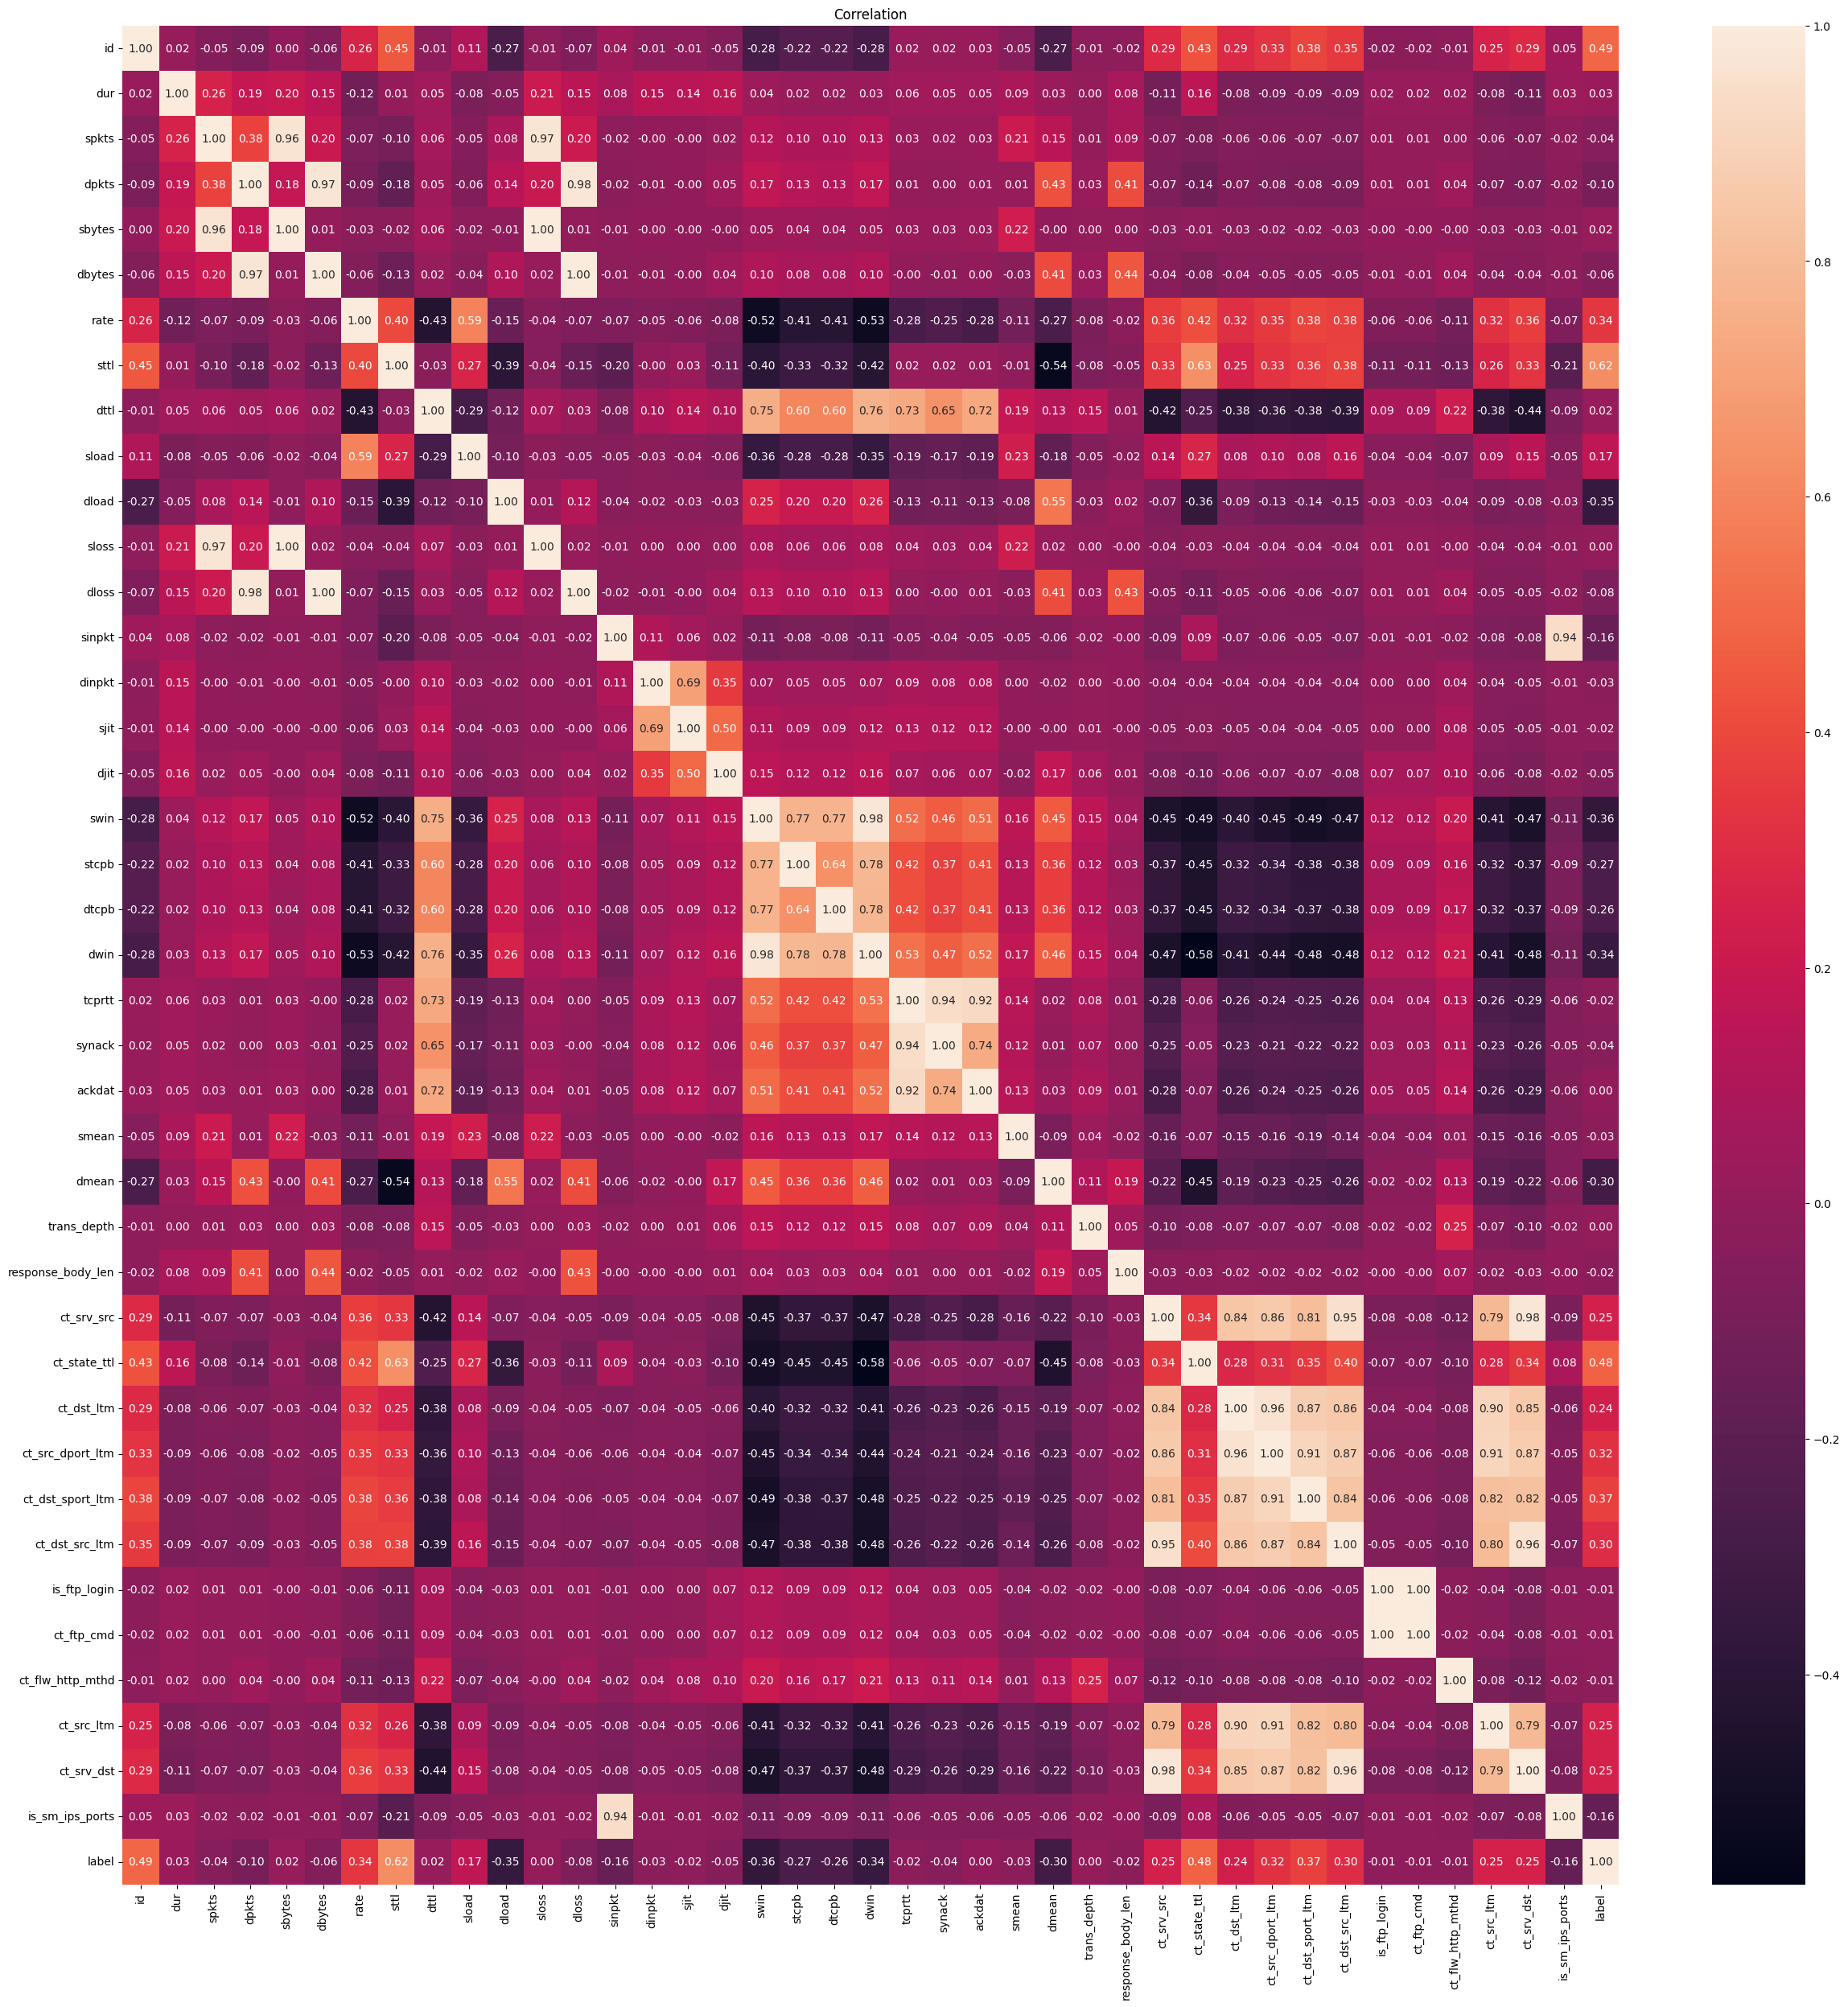

In [68]:
correlation_matrix = df_UNSW_NB15[numeric_columns].corr()
plt.figure(figsize=(30, 30))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")
plt.title('Correlation')
plt.show()

**Variables with Strong Positive Relationships:**

* spkts and sbytes have a strong positive relationship with dpkts and dbytes (correlation > 0.95). This may indicate a high correlation between the number of packets and the number of bytes in the packets.

* ct_srv_src has a strong positive relationship with ct_src_ltm, ct_srv_dst, and some other variables.

Variables with Strong Negative Relationships:

* dttl has a strong negative relationship with sttl (correlation < -0.45). This suggests a contrasting relationship between the Time to Live of the source and destination.

* dload has a strong negative relationship with sload (correlation < -0.35). This indicates an opposing relationship between download and upload loads.

**Variables with No Significant Relationships:**

* Some variables have a correlation very close to 0, for example: id, dwin, trans_depth.
General Relationships:

* Variables related to the number of packets and bytes tend to have a high correlation with each other.

* Time-related variables (e.g., dur, tcprtt, synack, ackdat) do not show strong relationships with other variables.

**Identifying Strong Relationships Between Variable Pairs:**
**Positive Relationships:**

* spkts and sbytes:

* Strong positive correlation (correlation > 0.95).
Indicates a close relationship between the number of packets (spkts) and the number of bytes (sbytes).

ct_srv_src and ct_src_ltm:

* Strong positive correlation (correlation = 0.822486).
Suggests a significant relationship between the number of connections with the same service and source address (ct_srv_src) and the number of connections with the same source address (ct_src_ltm).

ct_srv_src and ct_srv_dst:

* Strong positive correlation.
Indicates a close relationship between the number of connections with the same service and source address (ct_srv_src) and the number of connections with the same service and destination address (ct_srv_dst).

**Negative Relationships: dttl and sttl:**

* Strong negative correlation (correlation < -0.45).
Suggests an inverse relationship between the Time to Live of the destination (dttl) and the Time to Live of the source (sttl).
dload and sload:

* Strong negative correlation (correlation < -0.35).
Indicates an opposing relationship between download load (dload) and upload load (sload).

## Analysis of Attack Types

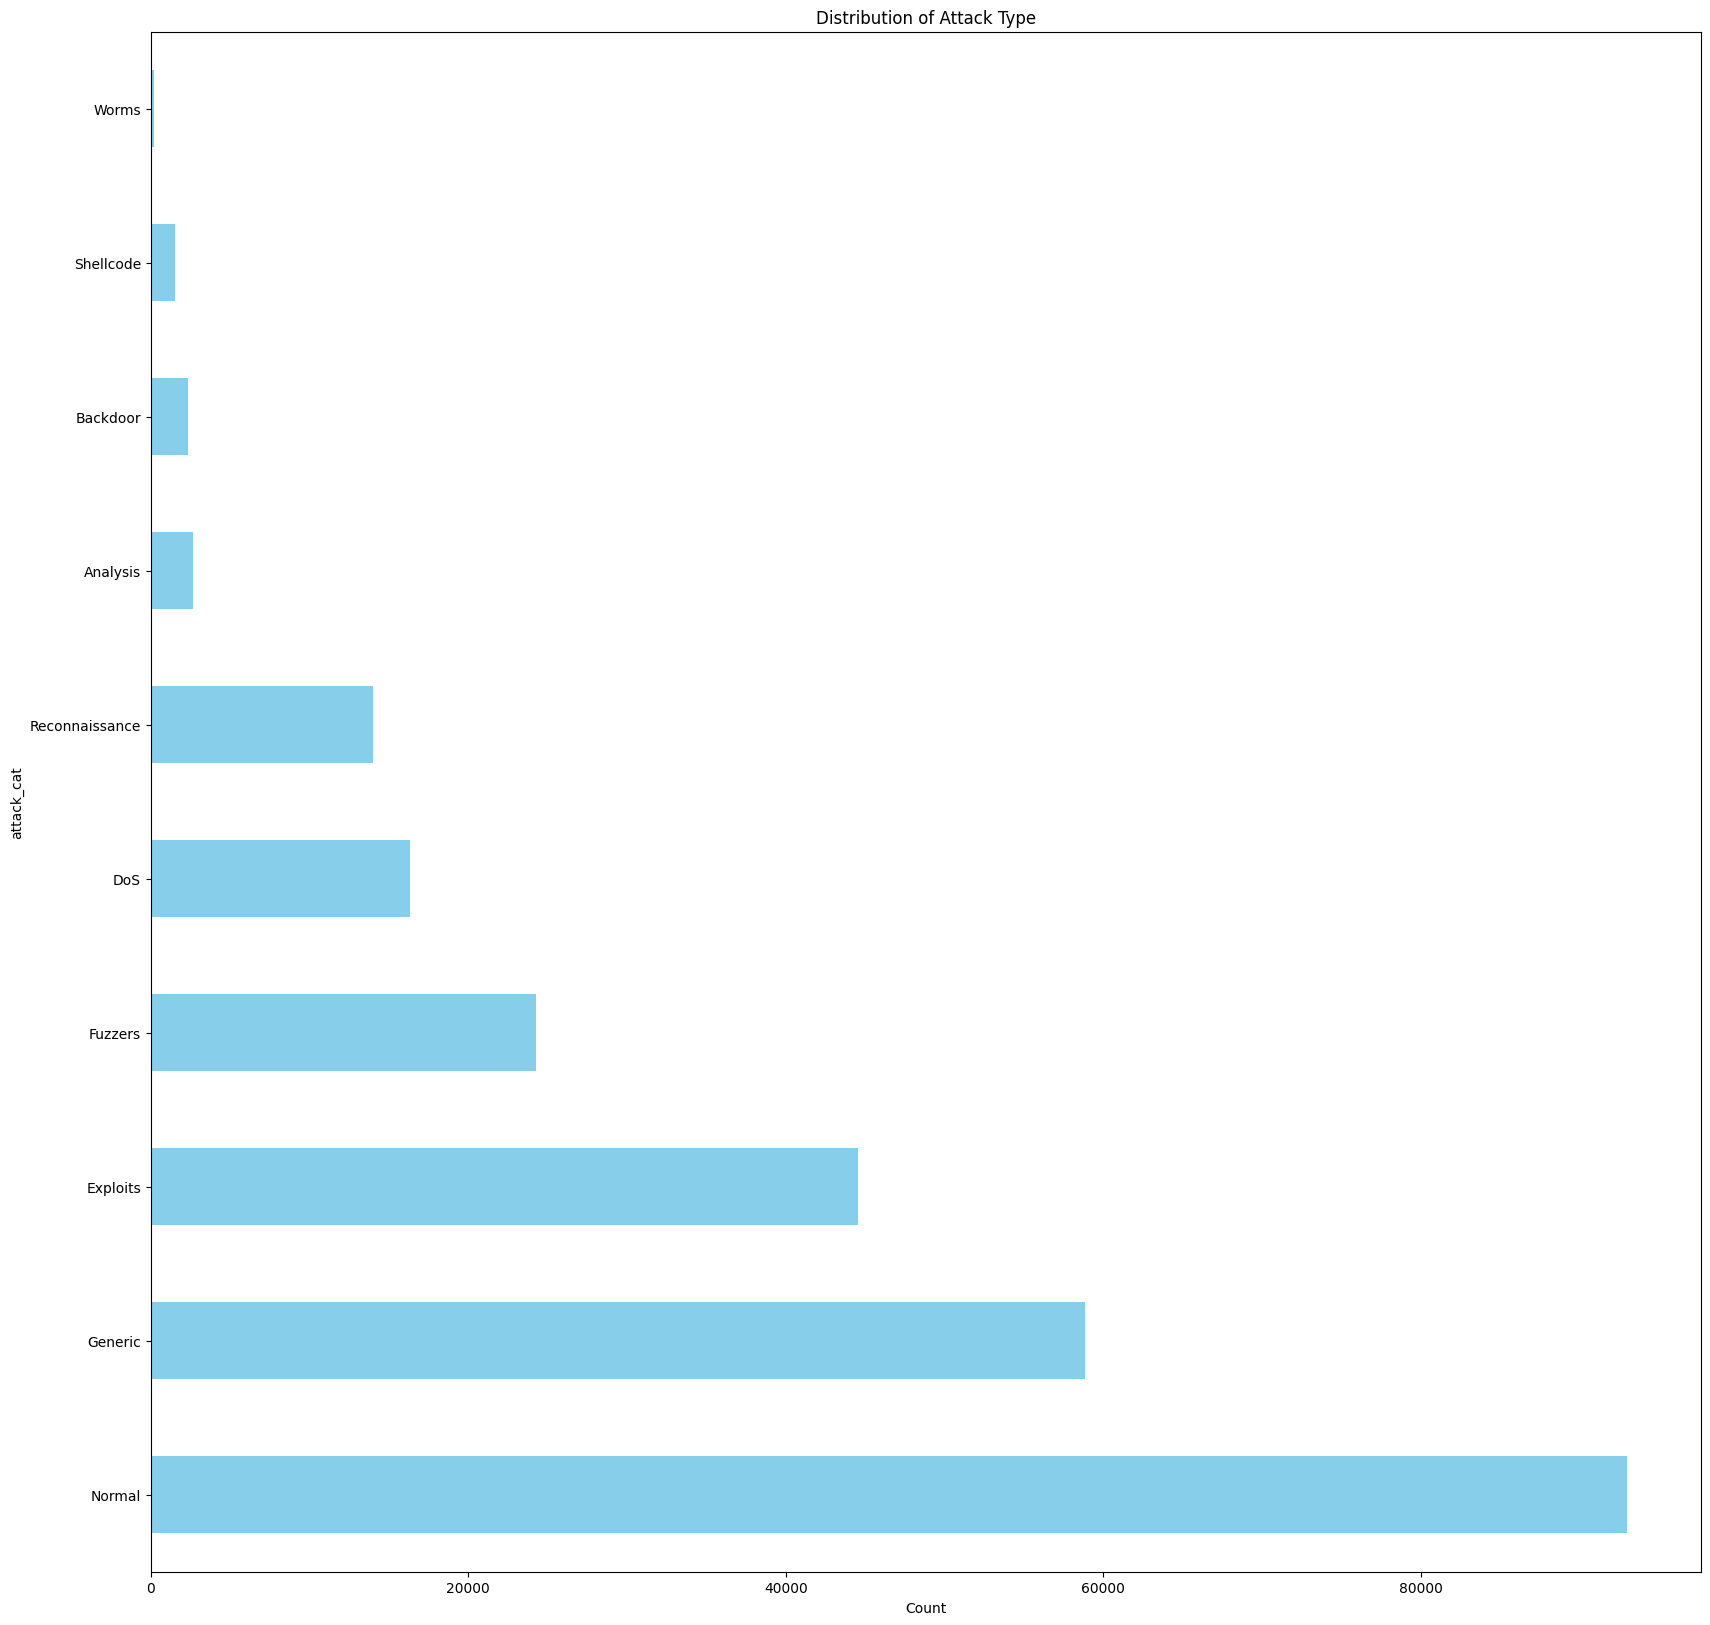

In [69]:
attack_cat_distribution = df_UNSW_NB15['attack_cat'].value_counts()
plt.figure(figsize=(20, 20))
attack_cat_distribution.plot(kind='barh', color='skyblue')
plt.title('Distribution of Attack Type')
plt.xlabel('Count')
plt.show()

* Common Attack Types: “Normal” dominates the data, suggesting that most communications in the network are legitimate and attack-free.

* Dominant Attack Type: "Generic", "Exploits", and "Fuzzers" make up a large number of attack types. This may imply that the system needs to pay special attention to these types of attacks, and security measures can be implemented to prevent them.

* Critical Attack Type: "Worms" are the least numerous, but they can often cause great damage due to their ability to spread quickly. Although small in number, special attention should be paid to this type of attack because of its highly dangerous nature.
* Specific Classification: Classifications such as "DoS", "Reconnaissance", "Analysis", "Backdoor", and "Shellcode" are also represented in the data, creating a need to detect and prevent specific types of attacks.
* The Importance of Classification: Understanding the types of attacks and classifying them helps determine priorities and appropriate security approaches. For example, a system can focus strongly on preventing "Exploits" attacks if they account for a high proportion.

## Comparison Between Normal and Attack Data

<Figure size 2000x2000 with 0 Axes>

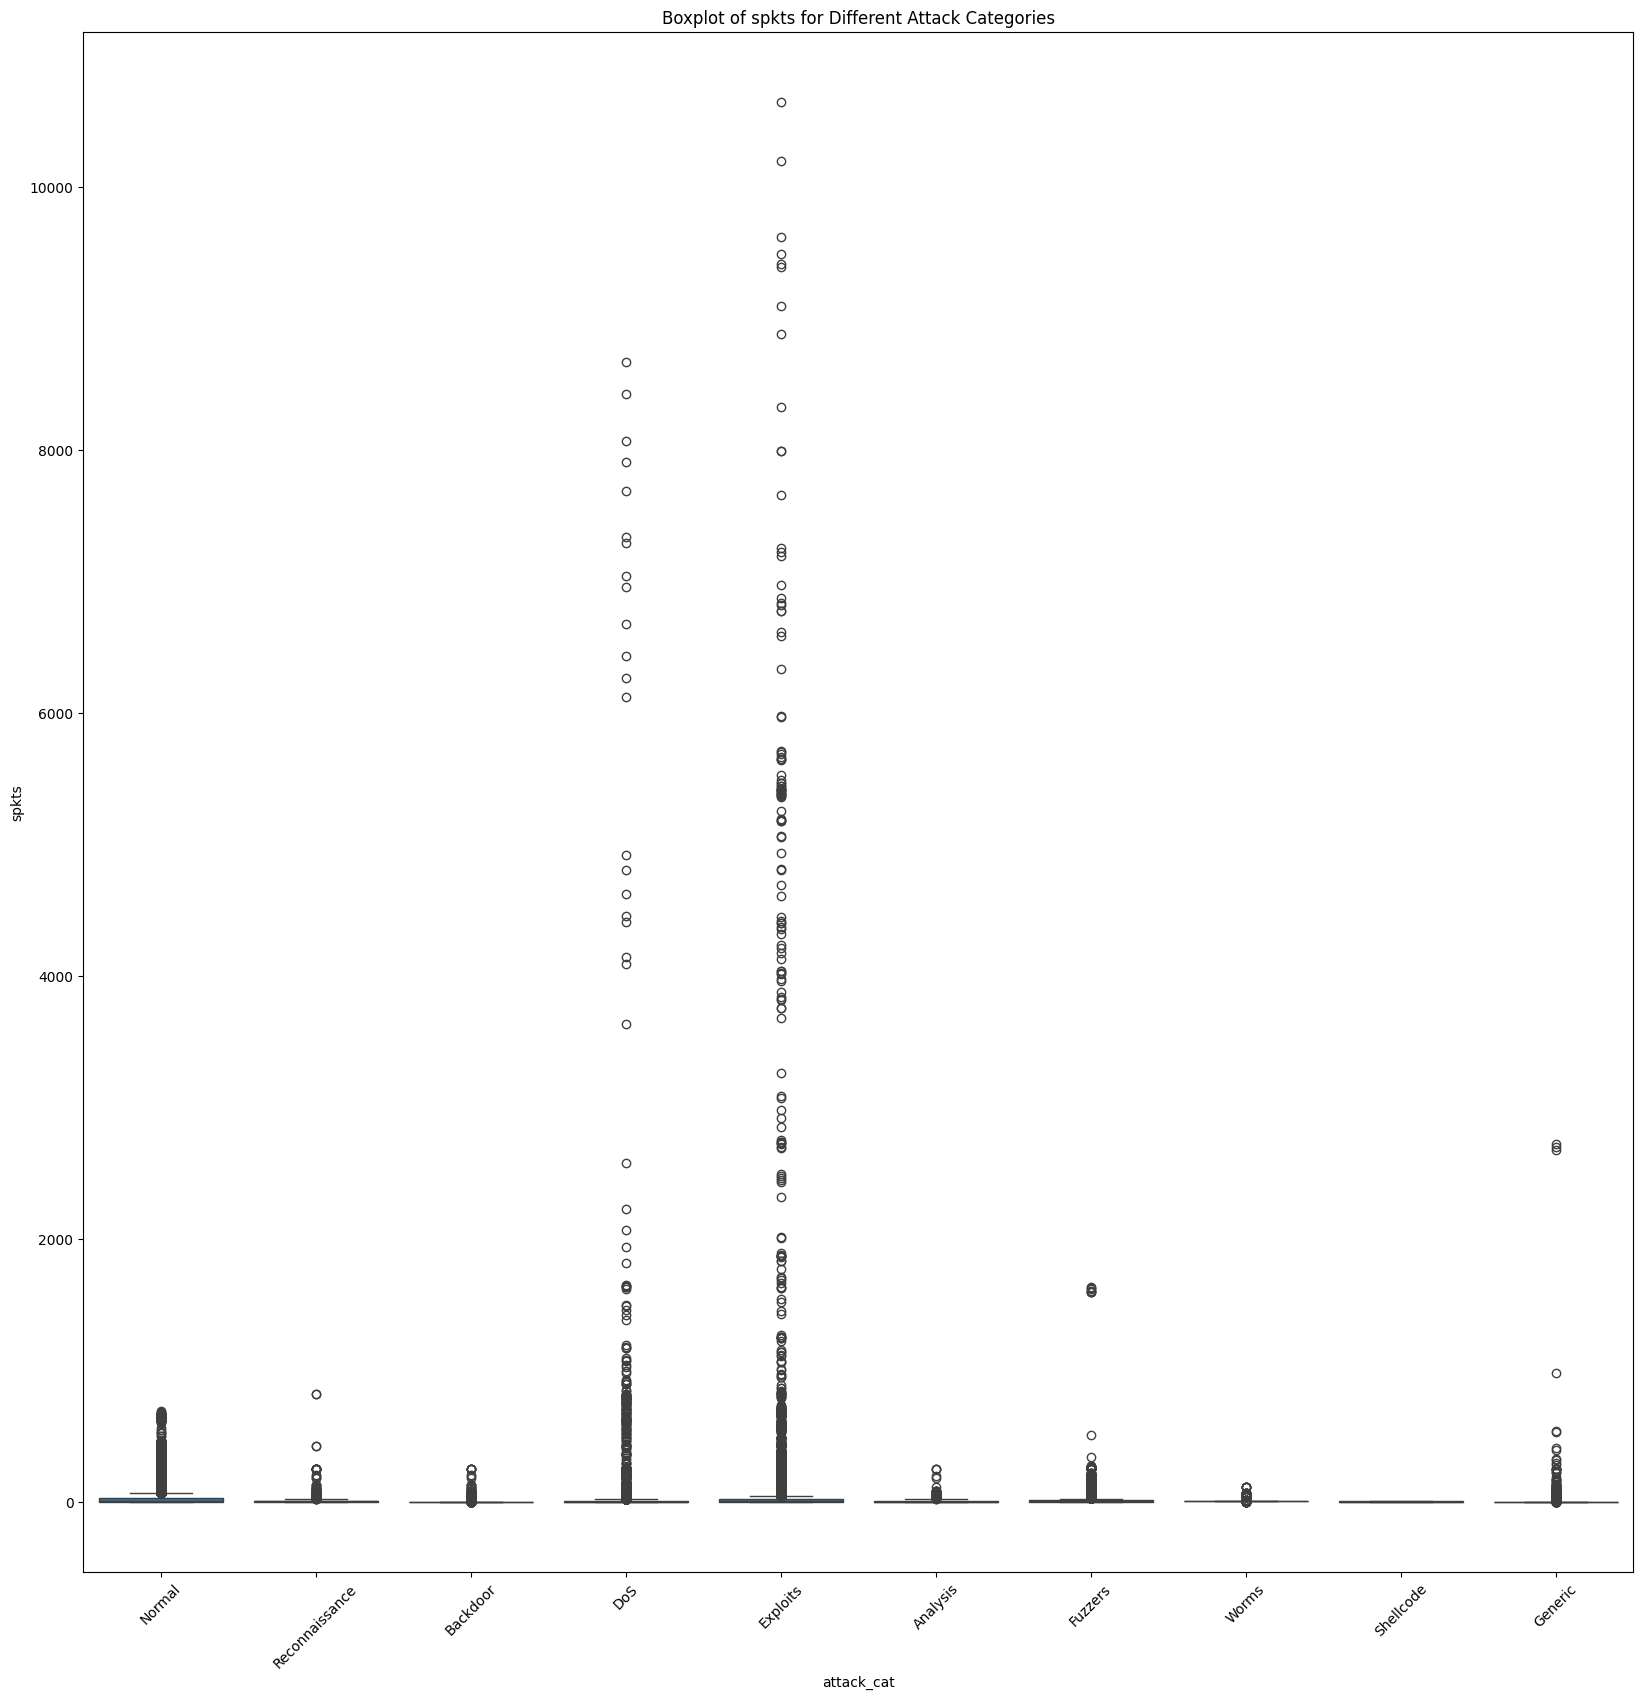

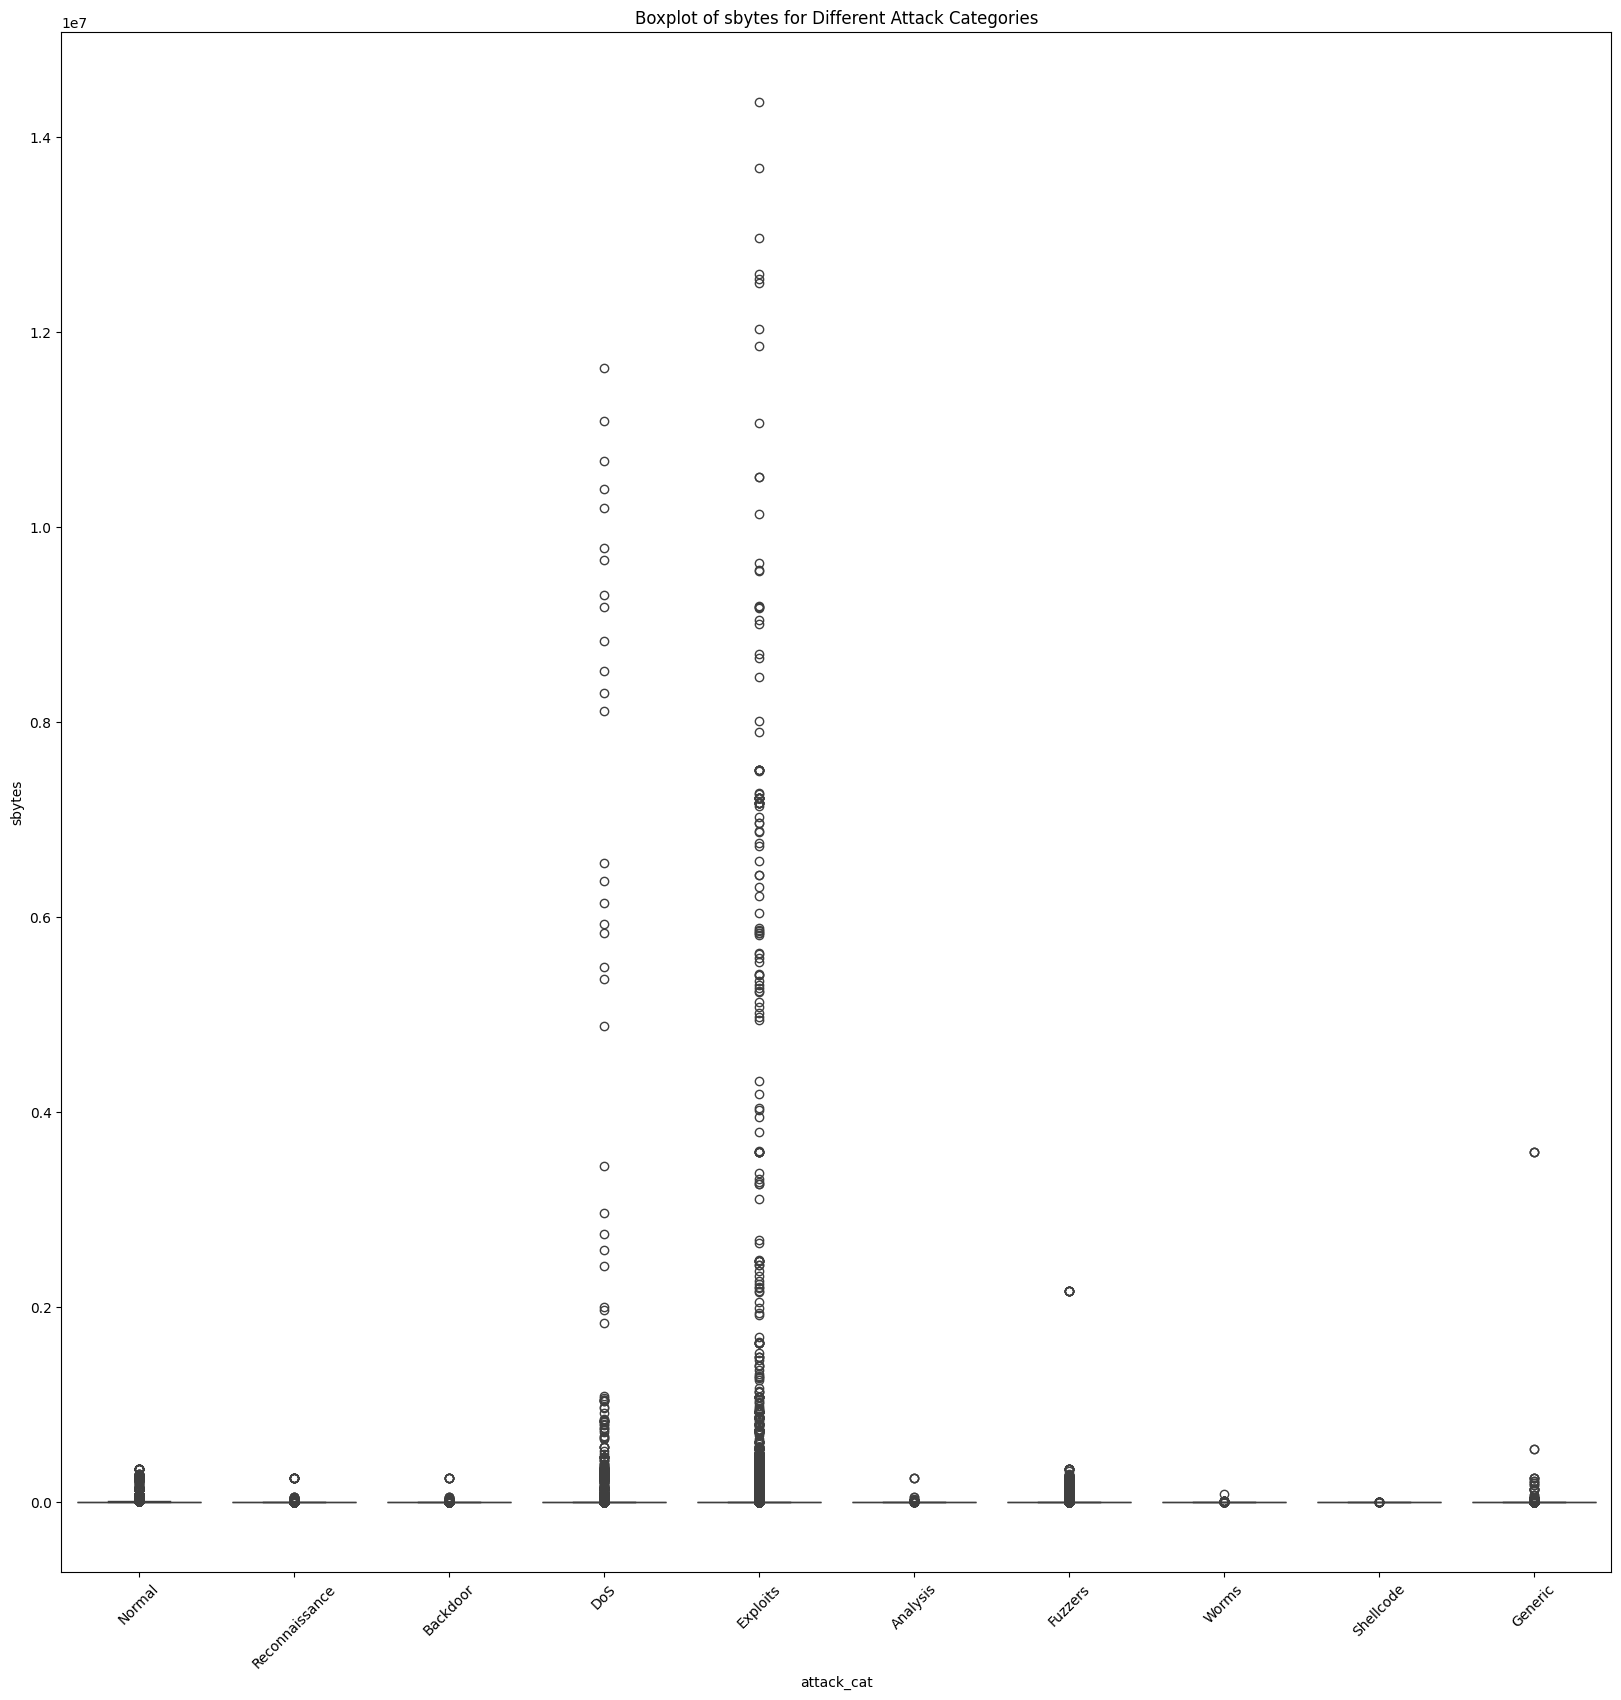

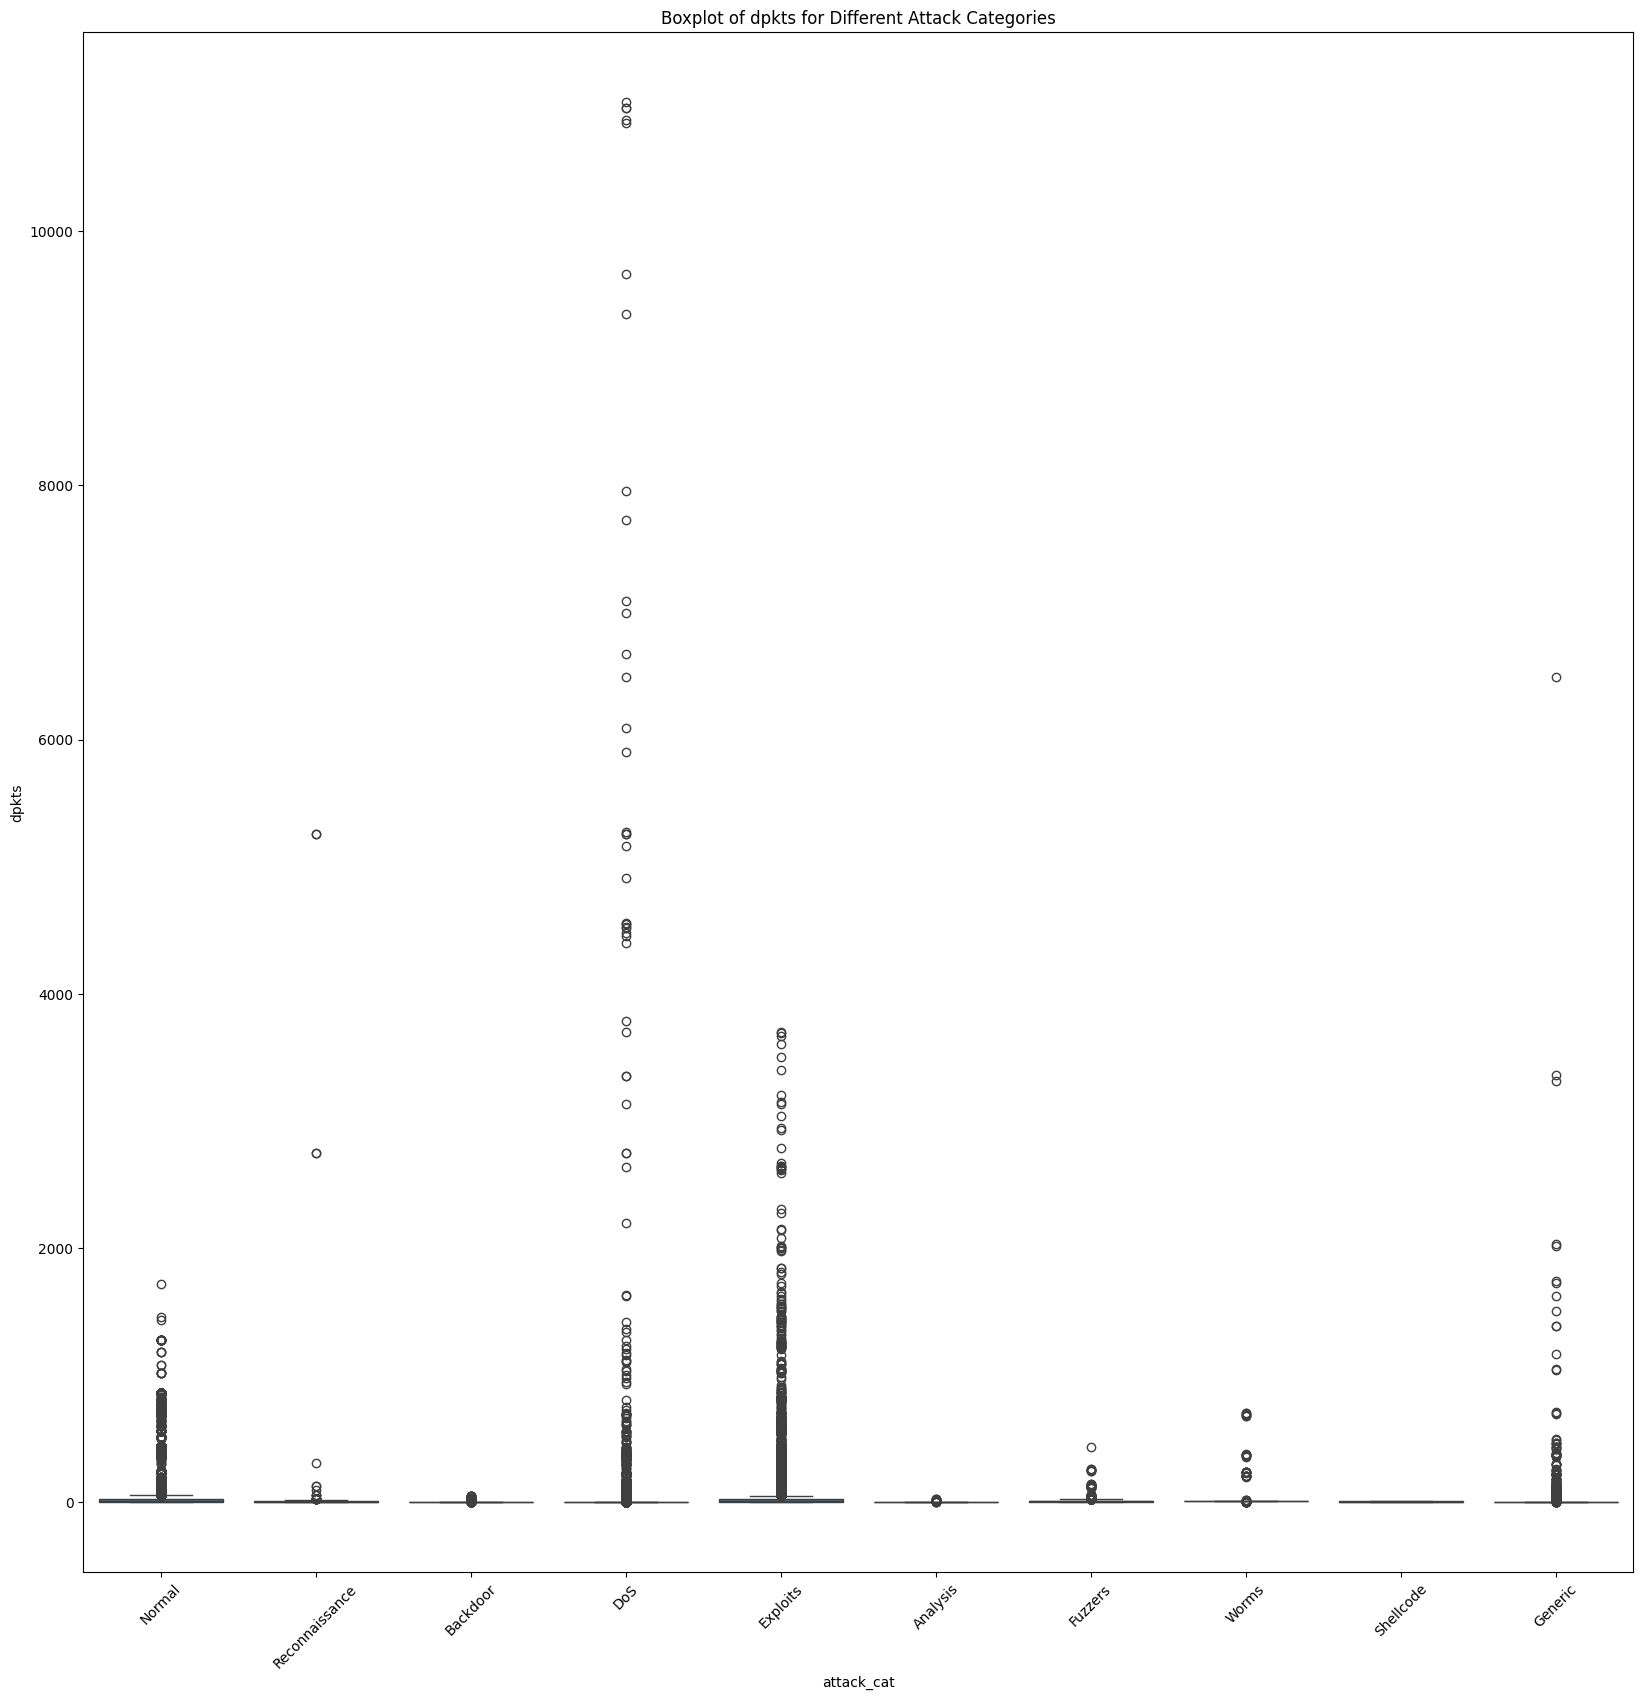

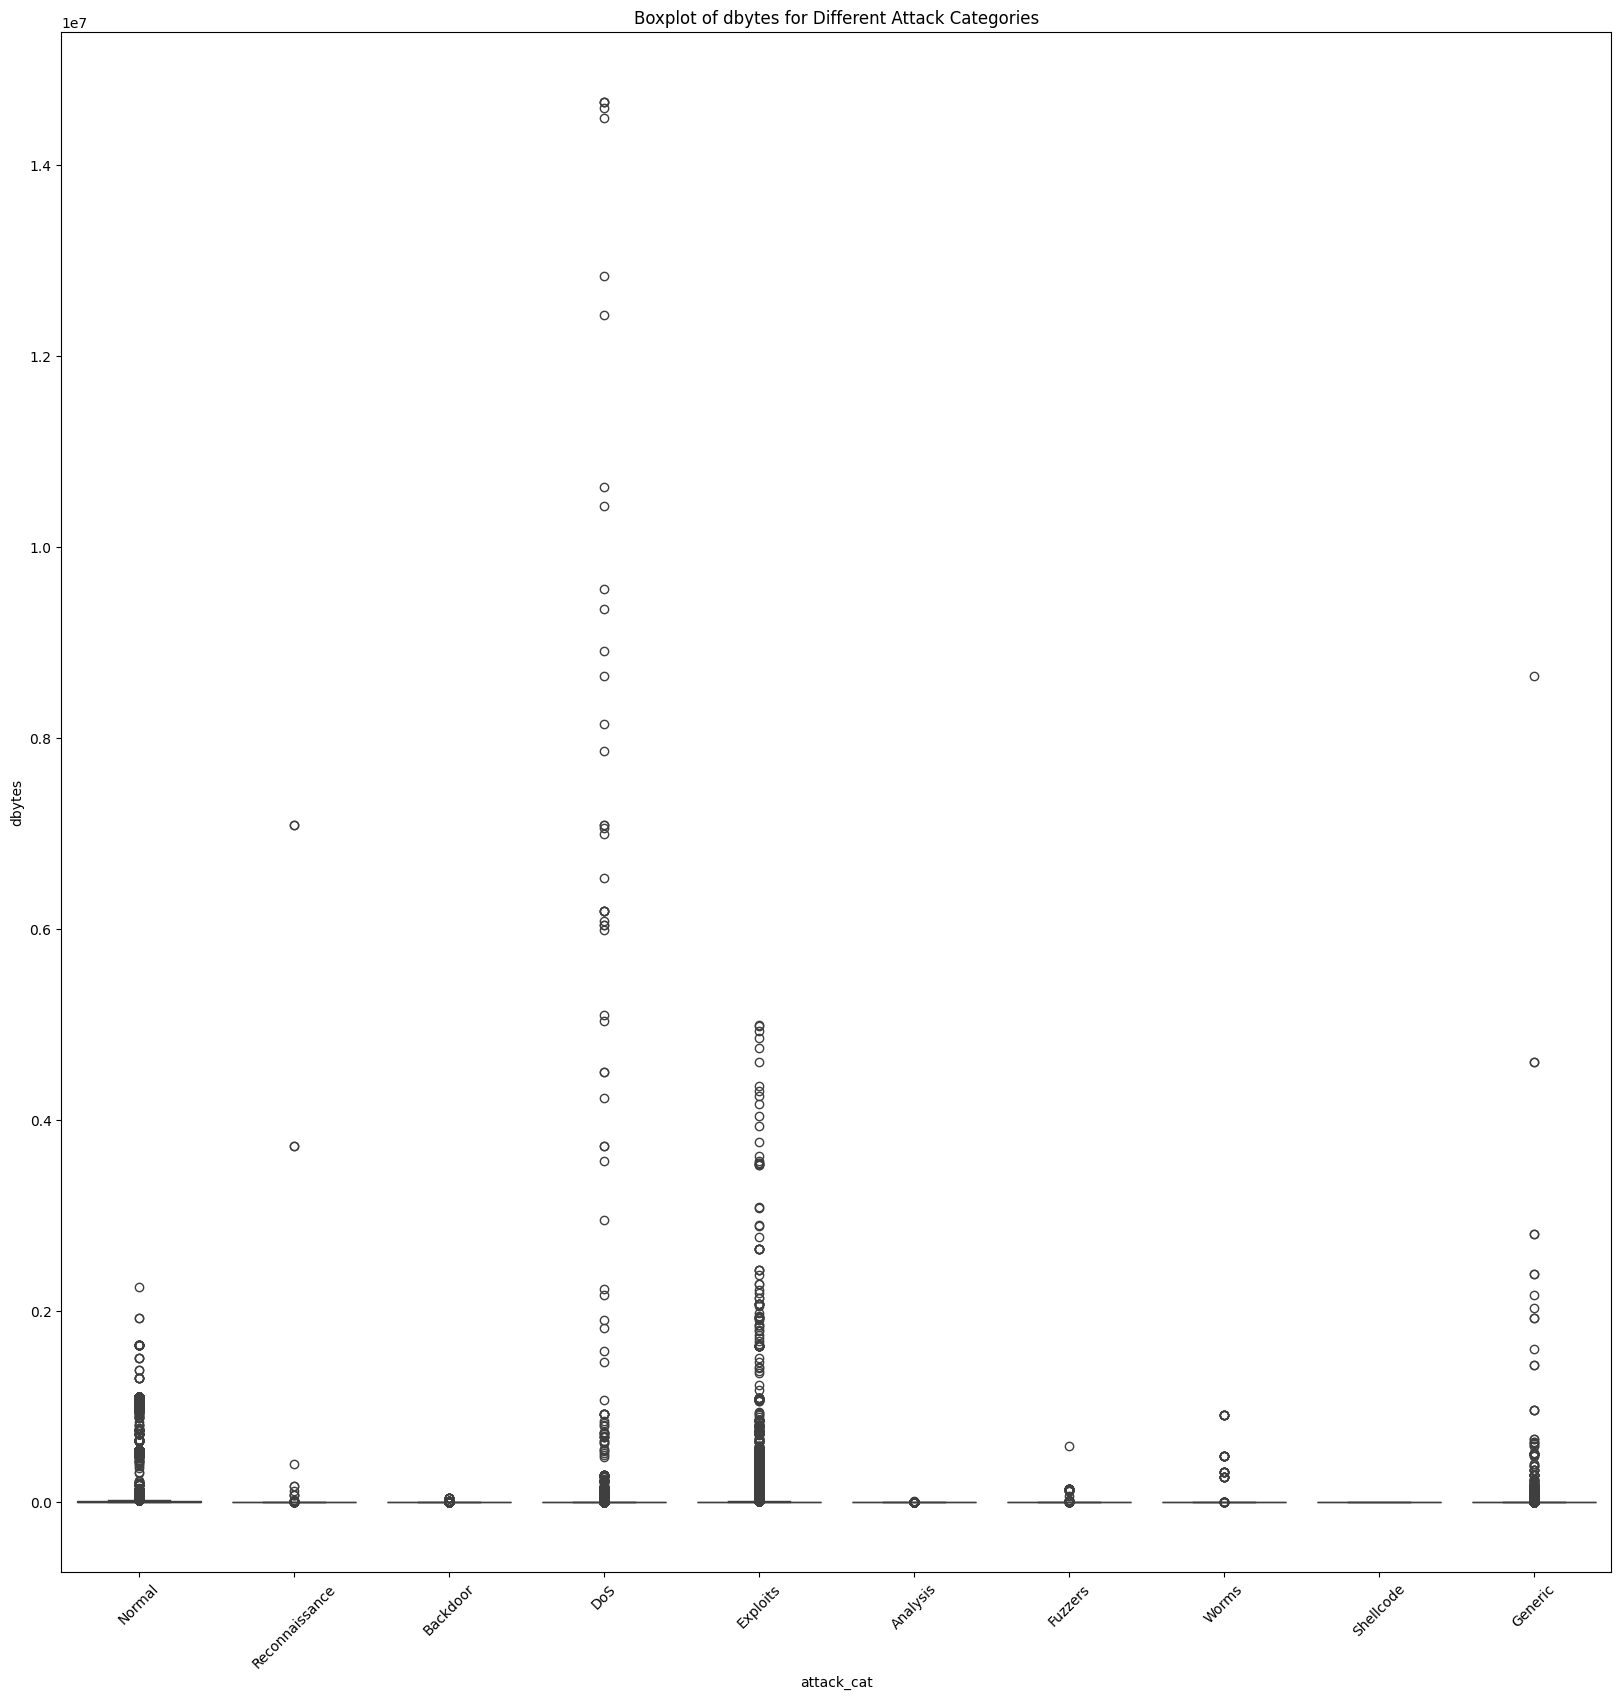

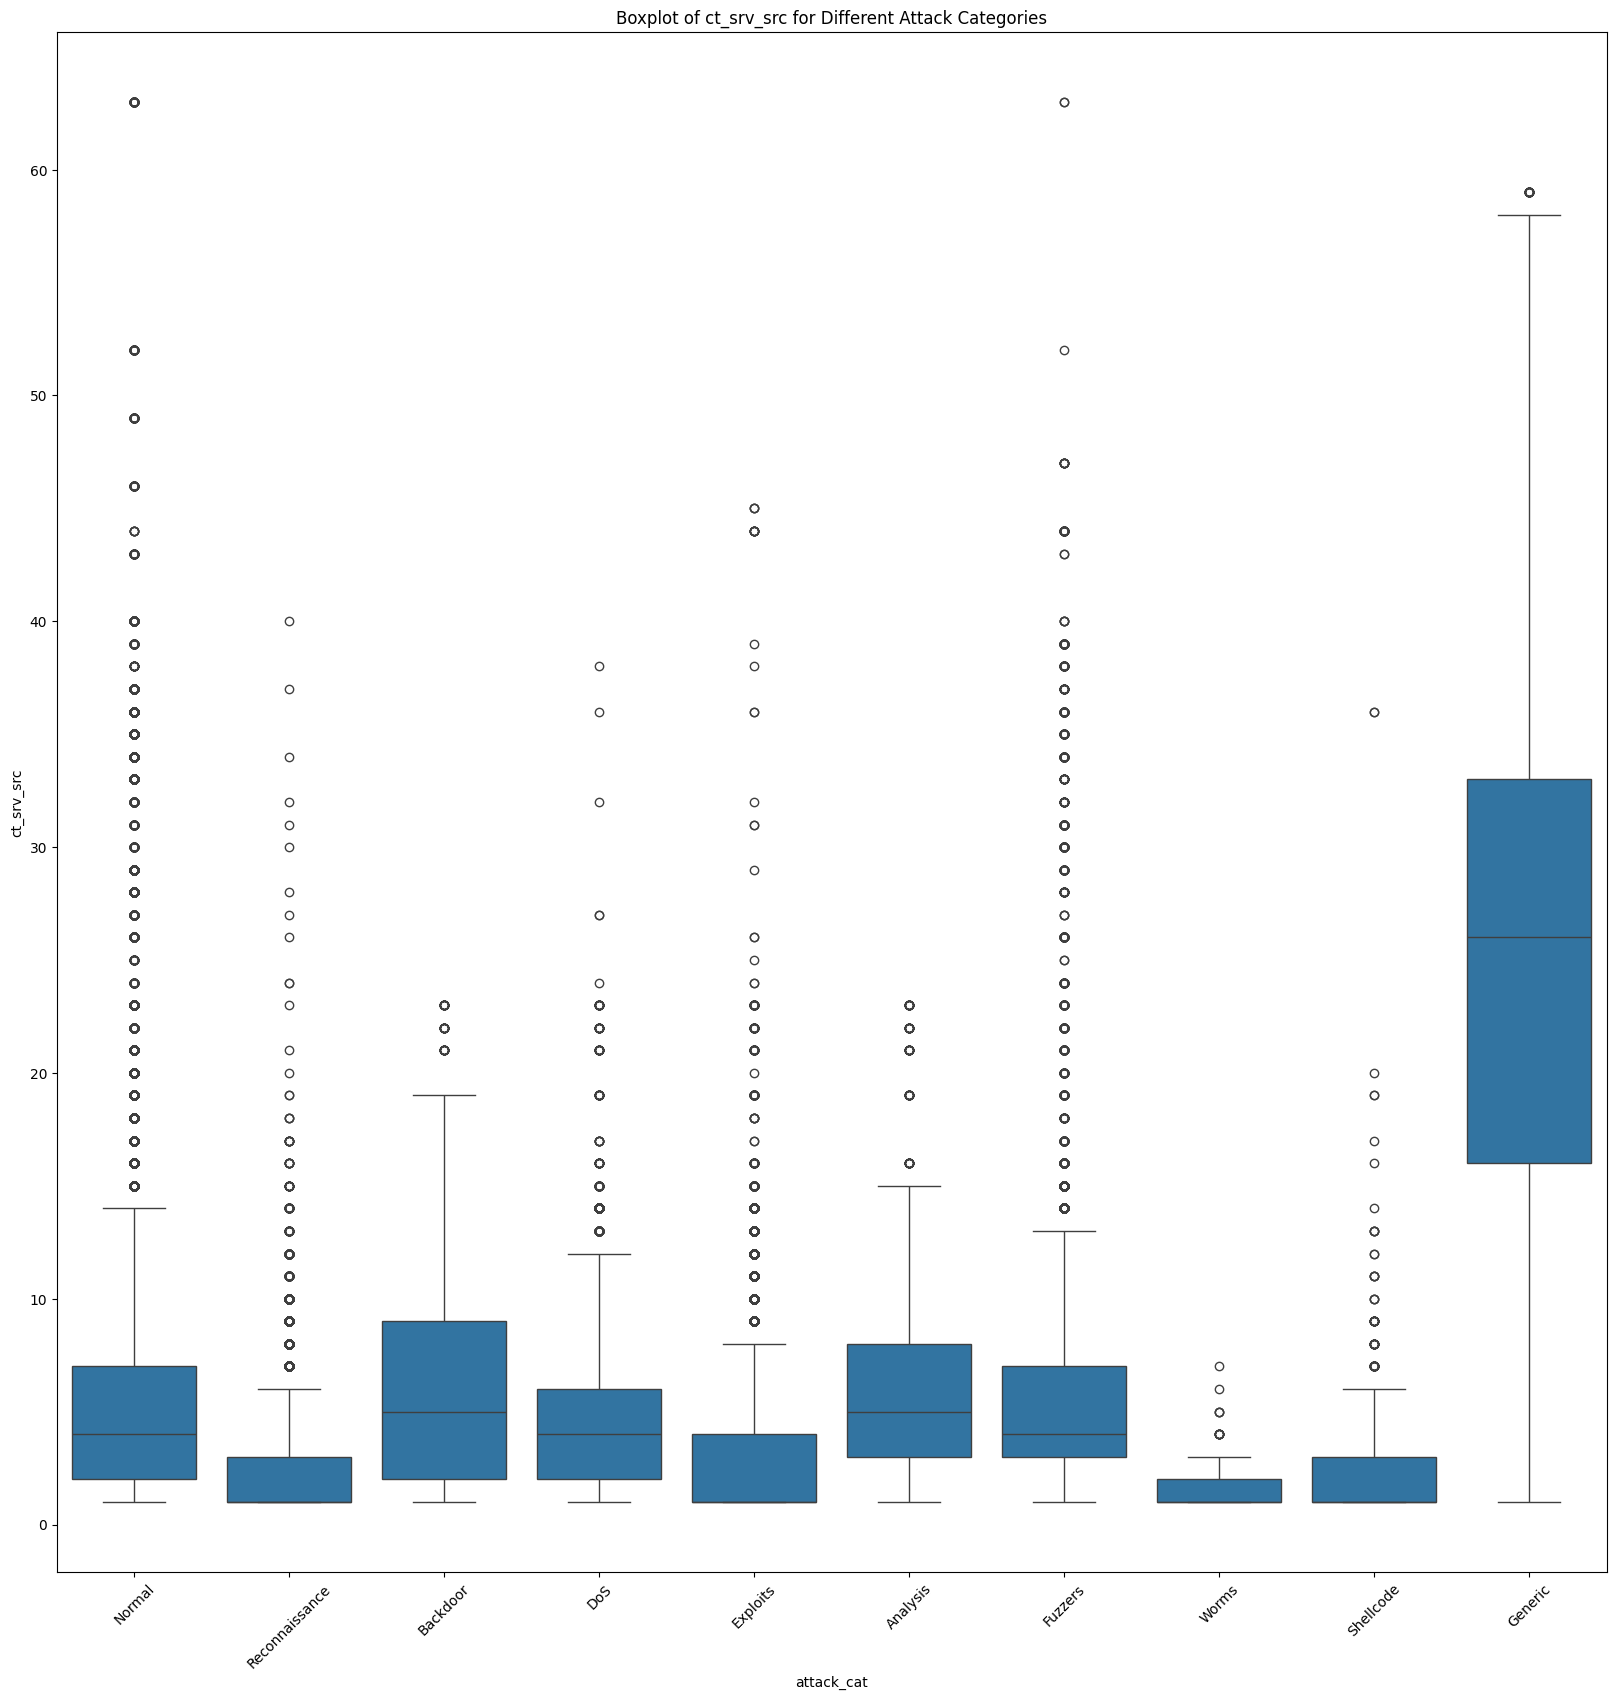

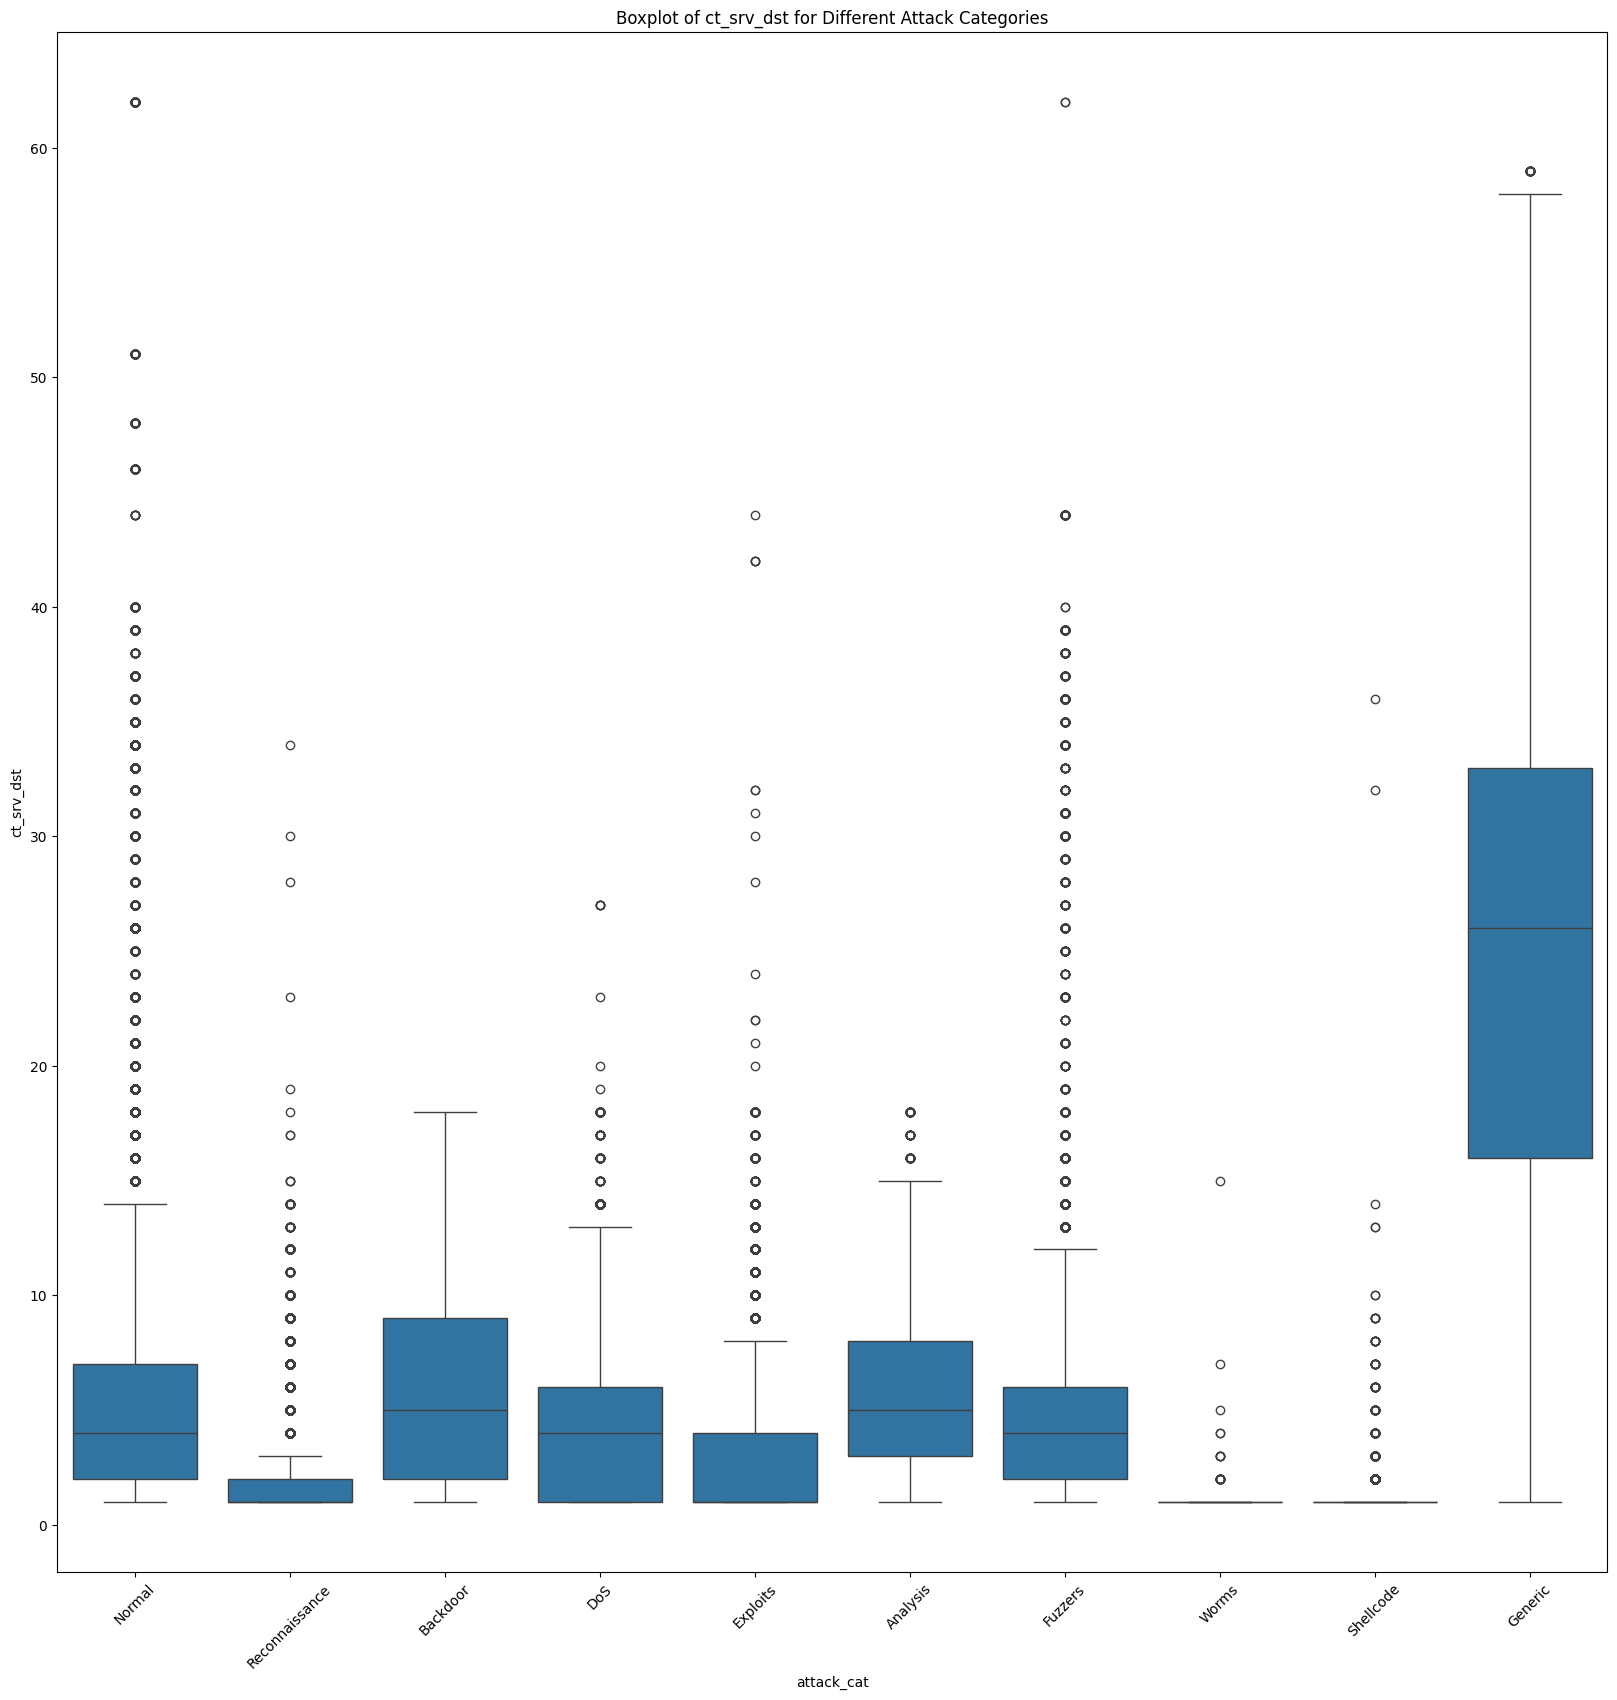

In [70]:
variables_to_analyze = ['spkts', 'sbytes', 'dpkts', 'dbytes', 'ct_srv_src', 'ct_srv_dst']

plt.figure(figsize=(20, 20))
for variable in variables_to_analyze:
    plt.figure(figsize=(20, 20))
    sns.boxplot(x='attack_cat', y=variable, data=df_UNSW_NB15)
    plt.title(f'Boxplot of {variable} for Different Attack Categories')
    plt.xticks(rotation=45)
    plt.show()

* Normal and Attacks Differ in Scale:
Normal data tends to have a larger scale compared to many types of attacks, as shown by fields such as the number of packets (spkts), number of bytes (sbytes), and the number of connections (ct_srv_src and ct_srv_dst).

* Attacks Usually Have a Smaller Scale:
Attack types such as Reconnaissance, Backdoor, and Analysis typically have lower average values across many numerical fields compared to normal data.

* Diverse Distribution of Attack Data:
Different attack types exhibit diversity in the average values and distribution of numerical fields. This highlights the distinct characteristics of each attack type.

* Significant Differences in Key Fields:
Fields such as the number of packets, number of bytes, and number of connections show substantial differences between normal and attack data.

In summary, these numerical fields can be utilized to build intrusion detection models based on the differences in features between normal and attack data.

# Pre-processing

- In order to evaluate and train a multi-class classification model for detecting the type of attack the data entries that were labeld as normal were dropped
- Data augmentation will be proformed, as we saw in the previous notebook multi-class classification over this dataset without data augmentation gave bad reultes because the abnormal classes is not balanced  

In [11]:
df_UNSW_NB15.drop(["id"],axis=1,inplace=True)

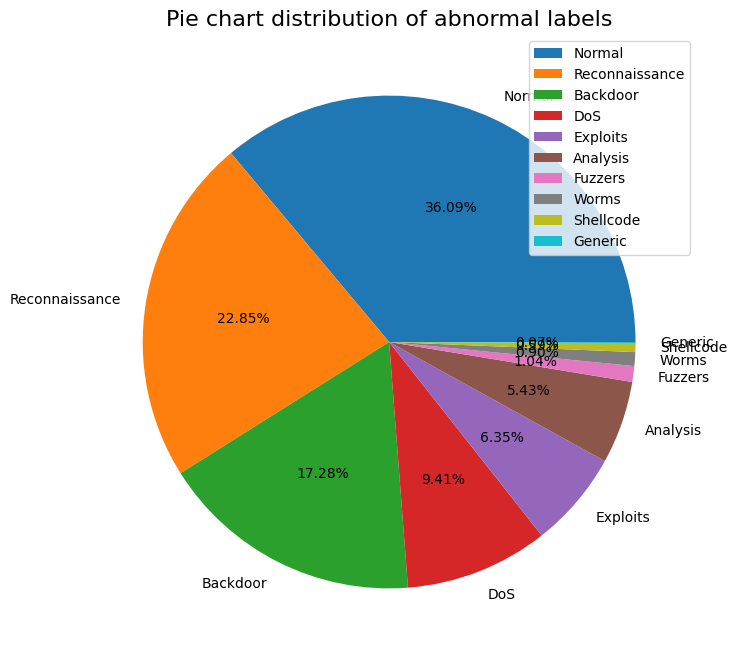

In [12]:
plt.figure(figsize=(8,8))
plt.pie(df_UNSW_NB15.attack_cat.value_counts(),labels =df_UNSW_NB15.attack_cat.unique(), autopct='%0.2f%%')
plt.title("Pie chart distribution of abnormal labels",fontsize=16)
plt.legend()
plt.show()

In [13]:
df_UNSW_NB15 = df_UNSW_NB15[df_UNSW_NB15["label"]==1]
df_UNSW_NB15.drop(["label"],inplace=True,axis=1)

<ipython-input-13-363afd8ef88e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_UNSW_NB15.drop(["label"],inplace=True,axis=1)


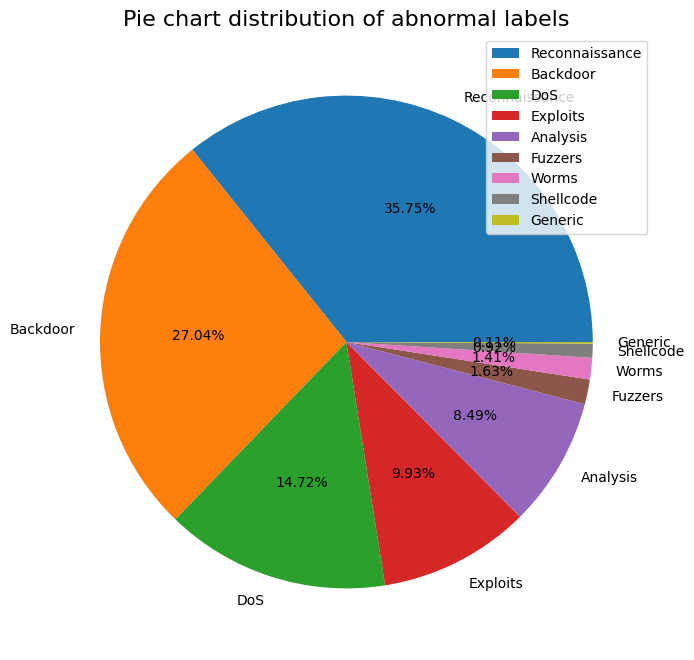

In [14]:
plt.figure(figsize=(8,8))
plt.pie(df_UNSW_NB15.attack_cat.value_counts(),labels =df_UNSW_NB15.attack_cat.unique(), autopct='%0.2f%%')
plt.title("Pie chart distribution of abnormal labels",fontsize=16)
plt.legend()
plt.show()

In [15]:
df_UNSW_NB15.shape

(164673, 43)

# 2. **Modeling**


In [16]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

In [17]:
from imblearn.datasets import make_imbalance
from imblearn.metrics import classification_report_imbalanced
from imblearn.pipeline import make_pipeline
from imblearn.under_sampling import NearMiss

In [18]:
np.random.seed(42)

In [19]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

def evaluate_model(y_true, y_predicted,title):
  """
  This function evaluates a classification model by printing classification report
  and plotting the confusion matrix.

  Args:
      y_true (array-like): True labels for the classification task.
      y_predicted (array-like): Predicted labels for the classification task.
  """

  # Print classification report
  print(classification_report(y_true, y_predicted))

  # Generate confusion matrix
  cf_matrix = confusion_matrix(y_true, y_predicted)

  # Create ConfusionMatrixDisplay object
  cmd = ConfusionMatrixDisplay(cf_matrix)
  # Plot the confusion matrix
  cmd.plot()
  plt.title(title)
  plt.show()



In [20]:
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
model_performance = pd.DataFrame(columns=['Accuracy','Recall','Precision','F1-Score'])

## Data Augmentation

In [21]:
from imblearn.under_sampling import TomekLinks
from collections import Counter
X = df_UNSW_NB15.drop("attack_cat",axis=1)
y,_ = pd.factorize(df_UNSW_NB15["attack_cat"])

In [22]:
numeric_cols= []
cat_cols=[]
for data in X.columns:
  if X[data].dtype == 'object':
    cat_cols.append(data)
  else:
    numeric_cols.append(data)

### Preform Encoders

In [23]:
categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')), # Fill missing values with most frequent term
    ('encoder', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])

In [24]:
numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')), # Fill missing values with median
    ('scaler', StandardScaler()) # Perform standard scaling
])

In [25]:
preprocessor = ColumnTransformer([
    ('numerical', numerical_pipeline, numeric_cols),
    ('categorical', categorical_pipeline, cat_cols)  # Only encode categorical columns
])

In [26]:
# Fit and transform the data using the preprocessor pipeline
X = preprocessor.fit_transform(X)

### Over-Sampling to increase the dataset

In [27]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(sampling_strategy='all',n_jobs=-1,k_neighbors=3)
X_res, y_res = sm.fit_resample(X, y)
freq =Counter(y_res)
print(freq)
print(Counter(y))


/usr/local/lib/python3.10/dist-packages/imblearn/over_sampling/_smote/base.py:336: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


Counter({0: 58871, 1: 58871, 2: 58871, 3: 58871, 4: 58871, 5: 58871, 6: 58871, 7: 58871, 8: 58871})
Counter({8: 58871, 3: 44525, 5: 24246, 2: 16353, 0: 13987, 4: 2677, 1: 2329, 7: 1511, 6: 174})


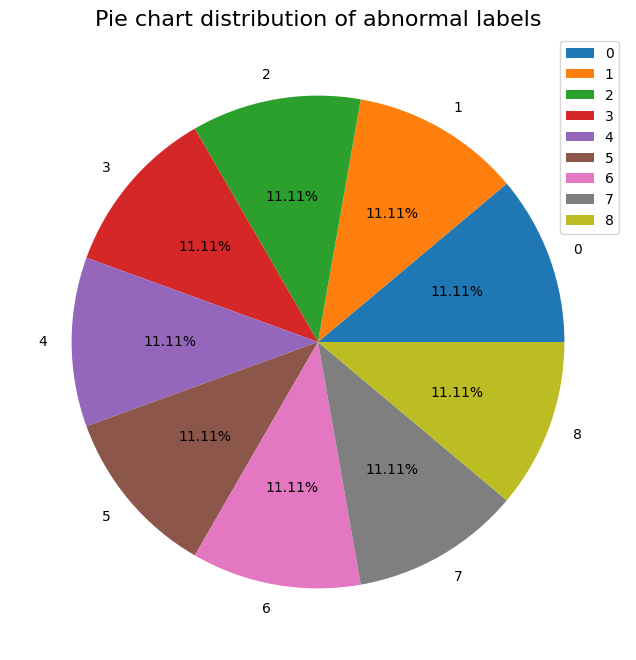

In [28]:
plt.figure(figsize=(8,8))
plt.pie(freq.values(),labels =freq.keys(), autopct='%0.2f%%')
plt.title("Pie chart distribution of abnormal labels",fontsize=16)
plt.legend()
plt.show()

### Under-Sampling to decrease the noise in the dataset

In [29]:
from imblearn.under_sampling import EditedNearestNeighbours

# Assuming X and y are your feature matrix and target vector
enn = EditedNearestNeighbours(n_jobs=-1)
X_resampled, y_resampled = enn.fit_resample(X_res, y_res)
freq =Counter(y_resampled)
print(freq)
print(Counter(y_res))


Counter({0: 58871, 7: 58498, 6: 58110, 8: 57314, 5: 47040, 3: 25948, 4: 19451, 1: 17219, 2: 12113})
Counter({0: 58871, 1: 58871, 2: 58871, 3: 58871, 4: 58871, 5: 58871, 6: 58871, 7: 58871, 8: 58871})


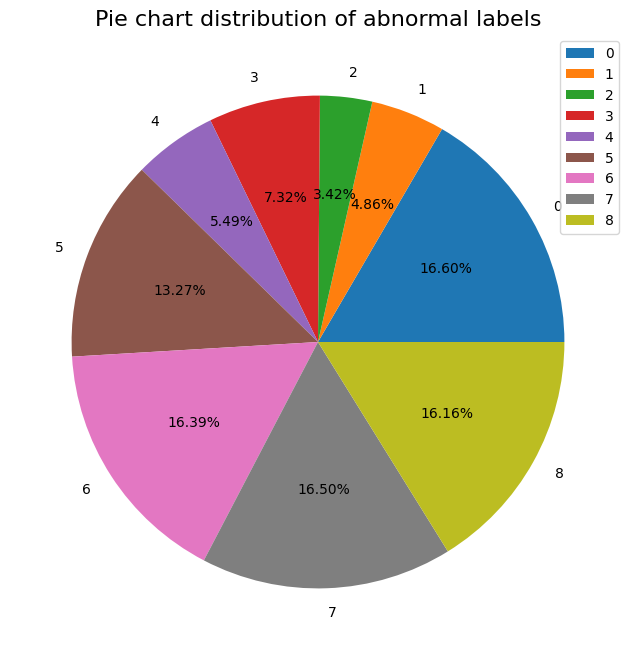

In [30]:
plt.figure(figsize=(8,8))
plt.pie(freq.values(),labels =freq.keys(), autopct='%0.2f%%')
plt.title("Pie chart distribution of abnormal labels",fontsize=16)
plt.legend()
plt.show()

## Train-Test split

In [31]:
X_train,X_val,y_train,y_val = train_test_split(X_resampled,y_resampled,test_size=0.2,
                                               random_state=21)


# Training and Testing

## Decision Tree Classifier

In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

Accuracy of Decision tree classifier on training set: 0.77
Accuracy of Decision tree classifier on test set: 0.77


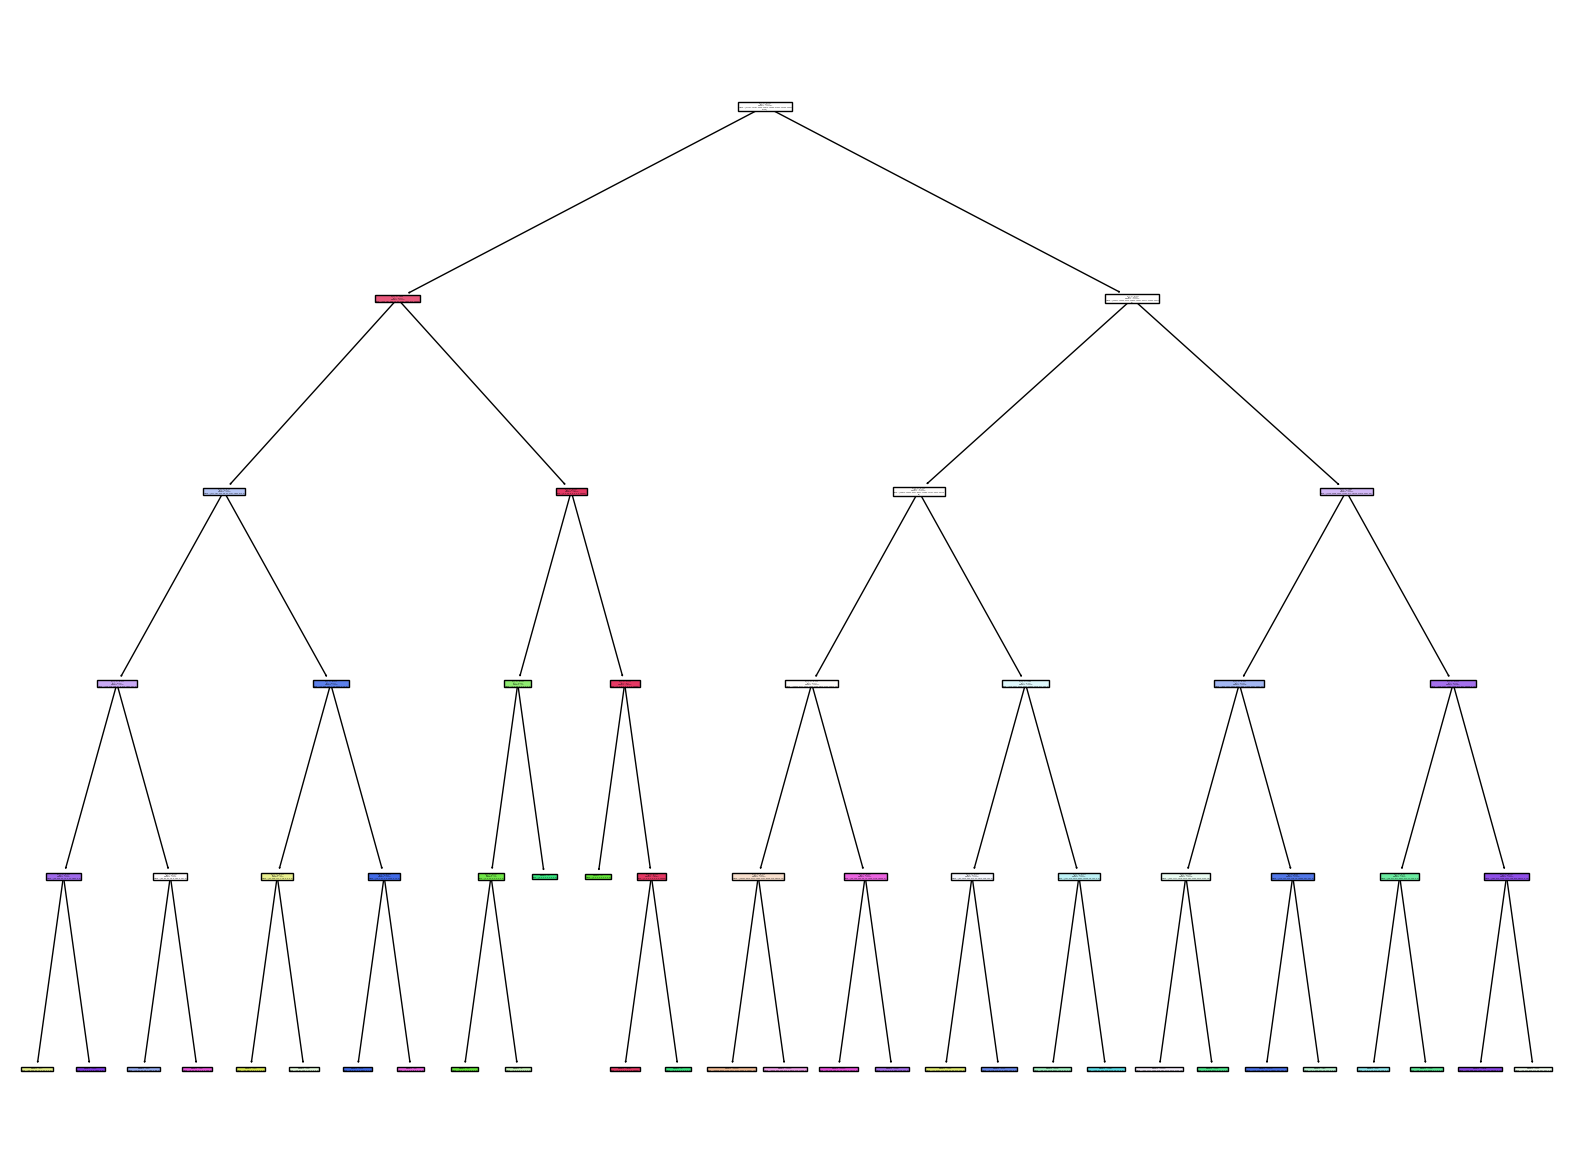

In [33]:
dtc=DecisionTreeClassifier(max_depth =5).fit(X_train, y_train)
print('Accuracy of Decision tree classifier on training set: {:.2f}'
     .format(dtc.score(X_train, y_train)))
print('Accuracy of Decision tree classifier on test set: {:.2f}'
     .format(dtc.score(X_val, y_val)))
plt.figure(figsize=(20,15))
plot_tree(dtc, filled=True)
plt.show()

              precision    recall  f1-score   support

           0       0.61      0.84      0.71     11710
           1       0.74      0.31      0.44      3432
           2       0.29      0.08      0.13      2418
           3       0.73      0.71      0.72      5069
           4       0.84      0.64      0.72      3766
           5       0.90      0.65      0.75      9406
           6       0.79      0.96      0.87     11655
           7       0.69      0.72      0.71     11851
           8       1.00      1.00      1.00     11606

    accuracy                           0.77     70913
   macro avg       0.73      0.66      0.67     70913
weighted avg       0.77      0.77      0.76     70913



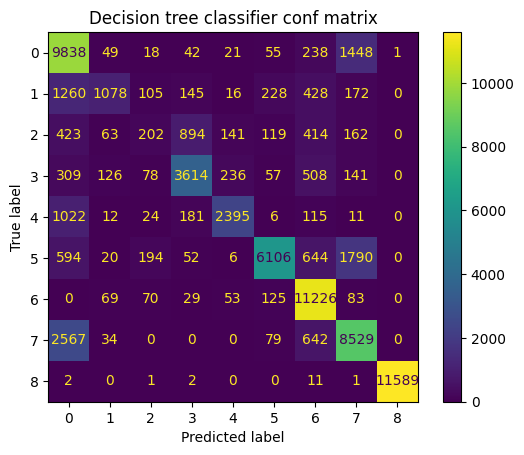

In [34]:
y_preds = dtc.predict(X_val)
accuracy = accuracy_score(y_val,y_preds)
recall = recall_score(y_val,y_preds,average="weighted")
precision = precision_score(y_val,y_preds,average="weighted")
f1 = f1_score(y_val,y_preds,average="weighted")
model_performance.loc["Decision Tree"] = [accuracy,recall,precision,f1]
evaluate_model(y_val, y_preds,'Decision tree classifier conf matrix')

Accuracy of Decision tree classifier on training set: 0.99
Accuracy of Decision tree classifier on test set: 0.96


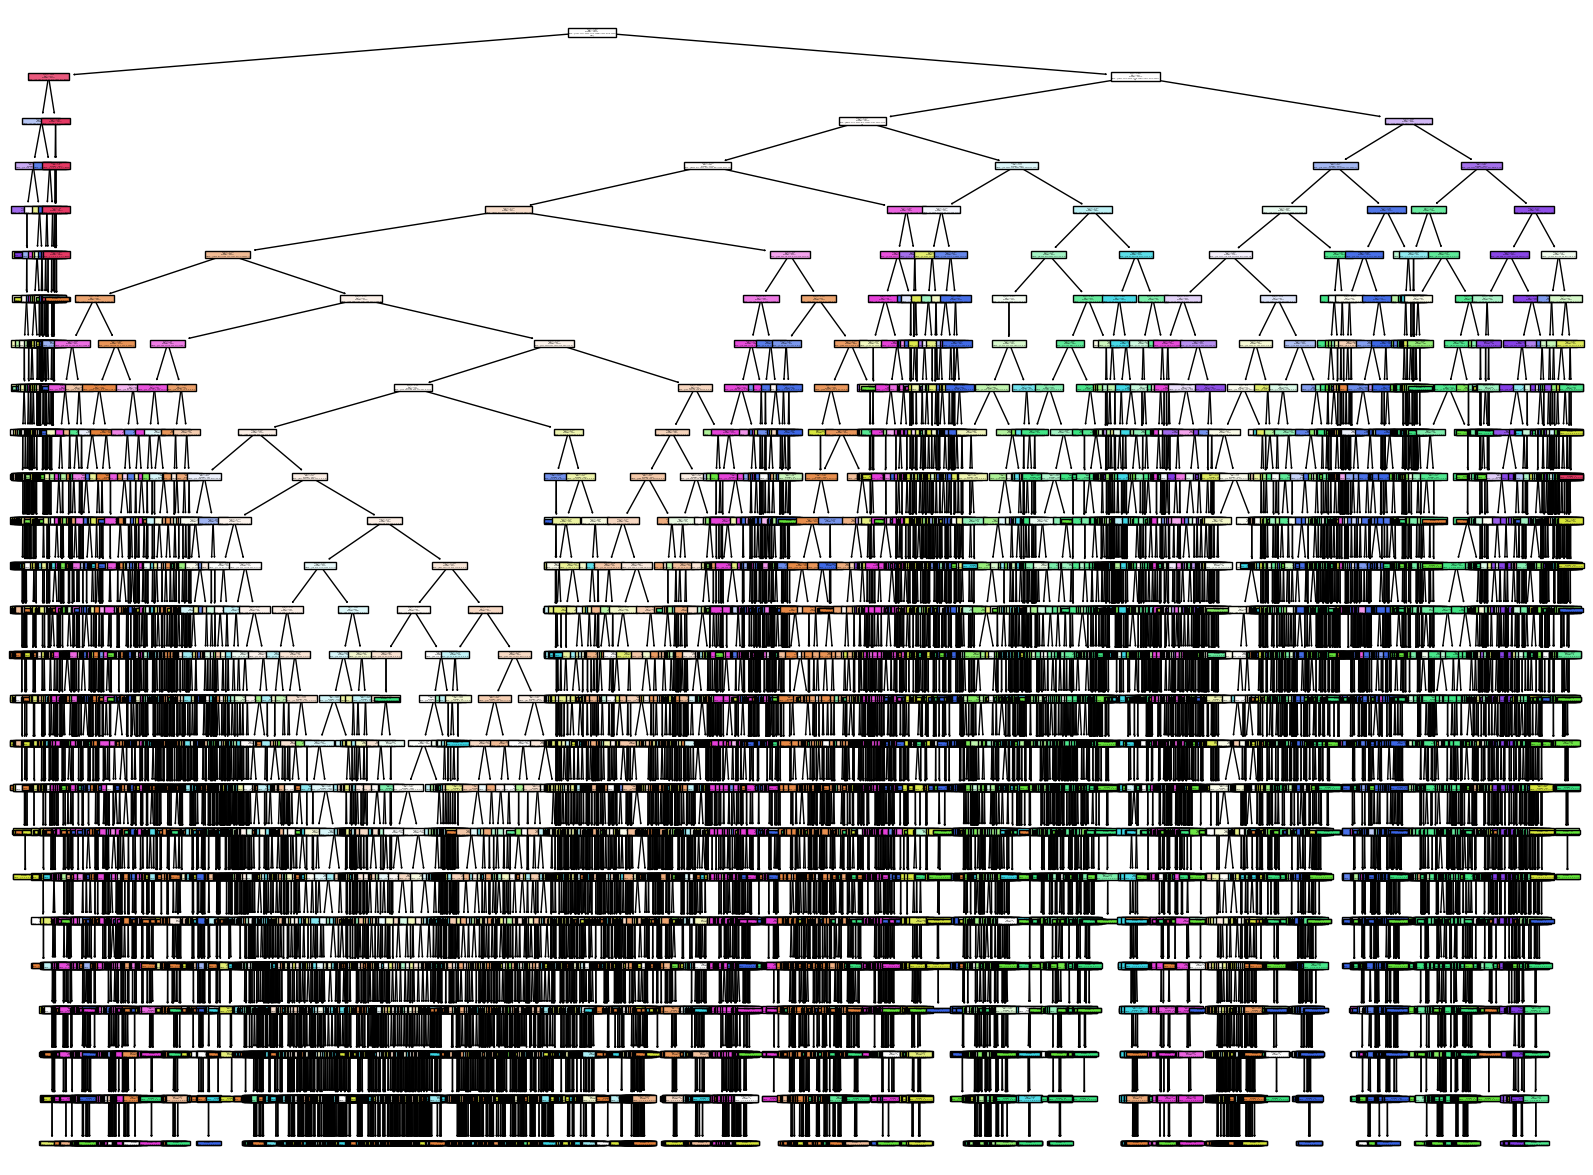

In [35]:
dtc=DecisionTreeClassifier(max_depth =25).fit(X_train, y_train)
print('Accuracy of Decision tree classifier on training set: {:.2f}'
     .format(dtc.score(X_train, y_train)))
print('Accuracy of Decision tree classifier on test set: {:.2f}'
     .format(dtc.score(X_val, y_val)))

plt.figure(figsize=(20,15))
plot_tree(dtc, filled=True)
plt.show()

              precision    recall  f1-score   support

           0       0.95      0.93      0.94     11710
           1       0.86      0.87      0.87      3432
           2       0.82      0.83      0.82      2418
           3       0.90      0.89      0.90      5069
           4       0.90      0.92      0.91      3766
           5       0.99      0.98      0.98      9406
           6       0.99      1.00      1.00     11655
           7       0.98      0.99      0.98     11851
           8       1.00      1.00      1.00     11606

    accuracy                           0.96     70913
   macro avg       0.93      0.93      0.93     70913
weighted avg       0.96      0.96      0.96     70913



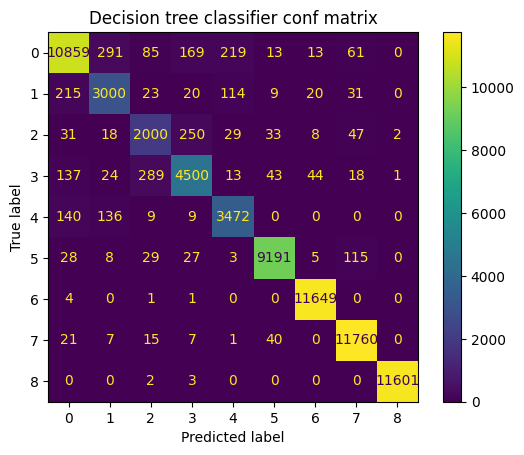

In [36]:
y_preds = dtc.predict(X_val)
accuracy = accuracy_score(y_val,y_preds)
recall = recall_score(y_val,y_preds,average="weighted")
precision = precision_score(y_val,y_preds,average="weighted")
f1 = f1_score(y_val,y_preds,average="weighted")
model_performance.loc["Decision Tree edited 1"] = [accuracy,recall,precision,f1]
evaluate_model(y_val, y_preds,'Decision tree classifier conf matrix')

Accuracy of Decision tree classifier on training set: 0.97
Accuracy of Decision tree classifier on test set: 0.95


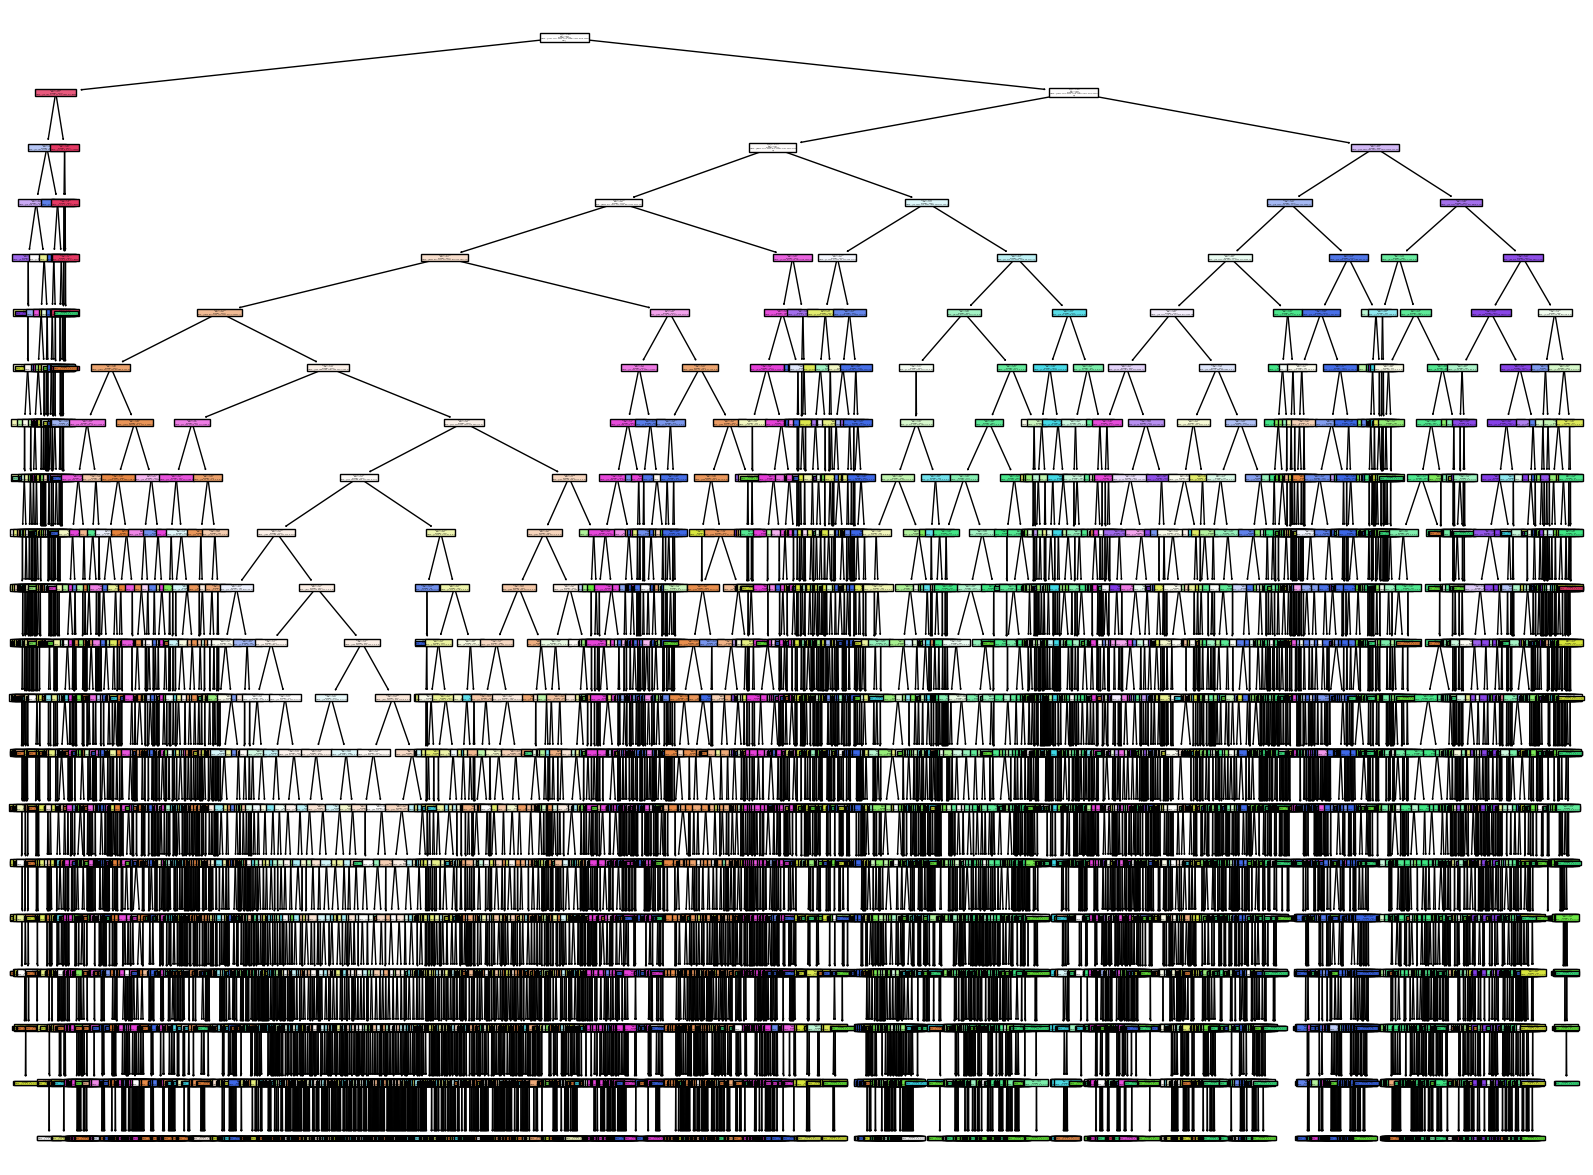

In [37]:
dtc=DecisionTreeClassifier(max_depth =20).fit(X_train, y_train)
print('Accuracy of Decision tree classifier on training set: {:.2f}'
     .format(dtc.score(X_train, y_train)))
print('Accuracy of Decision tree classifier on test set: {:.2f}'
     .format(dtc.score(X_val, y_val)))

plt.figure(figsize=(20,15))
plot_tree(dtc, filled=True)
plt.show()

              precision    recall  f1-score   support

           0       0.93      0.92      0.92     11710
           1       0.83      0.80      0.81      3432
           2       0.82      0.81      0.82      2418
           3       0.90      0.88      0.89      5069
           4       0.86      0.88      0.87      3766
           5       0.98      0.97      0.98      9406
           6       0.99      1.00      1.00     11655
           7       0.97      0.99      0.98     11851
           8       1.00      1.00      1.00     11606

    accuracy                           0.95     70913
   macro avg       0.92      0.92      0.92     70913
weighted avg       0.95      0.95      0.95     70913



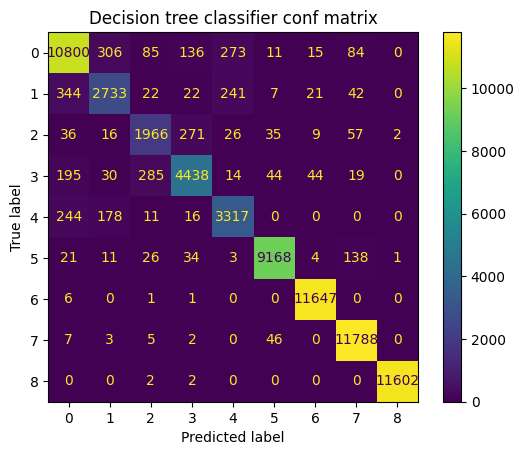

In [38]:
y_preds = dtc.predict(X_val)
accuracy = accuracy_score(y_val,y_preds)
recall = recall_score(y_val,y_preds,average="weighted")
precision = precision_score(y_val,y_preds,average="weighted")
f1 = f1_score(y_val,y_preds,average="weighted")
model_performance.loc["Decision Tree edited 2"] = [accuracy,recall,precision,f1]
evaluate_model(y_val, y_preds,'Decision tree classifier conf matrix')

### Decision tree Conclusion:

The decision tree classifier had a good baseline however it was always biased towards one class.

## Random Forest

In [39]:
from sklearn.ensemble import RandomForestClassifier

In [40]:
forest_reg = RandomForestClassifier( max_depth=5, n_estimators=50)
forest_reg.fit(X_train, y_train)
score_randomforest = forest_reg.score(X_val,y_val)
print('Random forest classifier Accuracy score (training)',forest_reg.score(X_train,y_train))
print('Random forest classifier Accuracy score (test) ',forest_reg.score(X_val,y_val))

Random forest classifier Accuracy score (training) 0.831077627083987
Random forest classifier Accuracy score (test)  0.8334437973291215


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:13

              precision    recall  f1-score   support

           0       0.72      0.94      0.82     11710
           1       0.94      0.19      0.32      3432
           2       0.00      0.00      0.00      2418
           3       0.76      0.75      0.76      5069
           4       0.87      0.68      0.76      3766
           5       0.85      0.91      0.88      9406
           6       0.92      0.85      0.88     11655
           7       0.76      0.93      0.83     11851
           8       1.00      1.00      1.00     11606

    accuracy                           0.83     70913
   macro avg       0.76      0.69      0.69     70913
weighted avg       0.82      0.83      0.81     70913



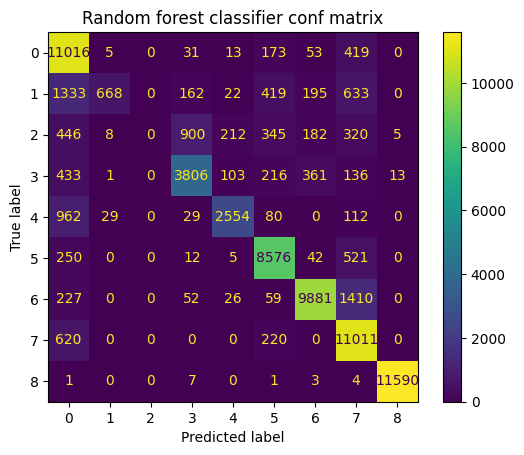

In [41]:
y_preds = forest_reg.predict(X_val)
accuracy = accuracy_score(y_val,y_preds)
recall = recall_score(y_val,y_preds,average="weighted")
precision = precision_score(y_val,y_preds,average="weighted")
f1 = f1_score(y_val,y_preds,average="weighted")
model_performance.loc["RF"] = [accuracy,recall,precision,f1]
evaluate_model(y_val, y_preds,'Random forest classifier conf matrix')


In [42]:
forest_reg = RandomForestClassifier( max_depth=15, n_estimators=50)
forest_reg.fit(X_train, y_train)
score_randomforest = forest_reg.score(X_val,y_val)
print('Random forest classifier Accuracy score (training)',forest_reg.score(X_train,y_train))
print('Random forest classifier Accuracy score (test) ',forest_reg.score(X_val,y_val))

Random forest classifier Accuracy score (training) 0.955177312965581
Random forest classifier Accuracy score (test)  0.944904319377265


              precision    recall  f1-score   support

           0       0.87      0.95      0.91     11710
           1       0.85      0.75      0.79      3432
           2       0.87      0.69      0.77      2418
           3       0.92      0.86      0.89      5069
           4       0.91      0.82      0.86      3766
           5       0.98      0.97      0.98      9406
           6       0.99      1.00      0.99     11655
           7       0.95      1.00      0.97     11851
           8       1.00      1.00      1.00     11606

    accuracy                           0.94     70913
   macro avg       0.93      0.89      0.91     70913
weighted avg       0.94      0.94      0.94     70913



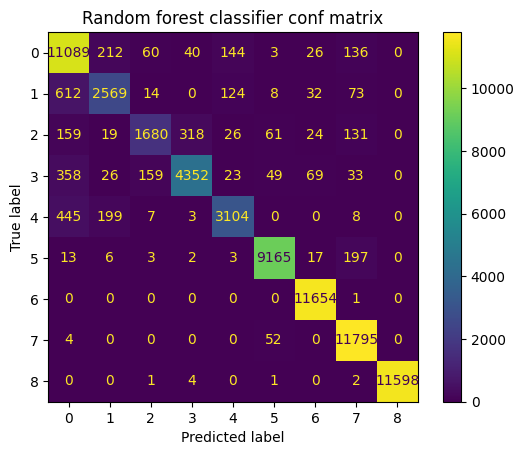

In [43]:
y_preds = forest_reg.predict(X_val)
accuracy = accuracy_score(y_val,y_preds)
recall = recall_score(y_val,y_preds,average="weighted")
precision = precision_score(y_val,y_preds,average="weighted")
f1 = f1_score(y_val,y_preds,average="weighted")
model_performance.loc["RF edited 1"] = [accuracy,recall,precision,f1]
evaluate_model(y_val, y_preds,'Random forest classifier conf matrix')

In [44]:
forest_reg = RandomForestClassifier( max_depth=25, n_estimators=50)
forest_reg.fit(X_train, y_train)
score_randomforest = forest_reg.score(X_val,y_val)
print('Random forest classifier Accuracy score (training)',forest_reg.score(X_train,y_train))
print('Random forest classifier Accuracy score (test) ',forest_reg.score(X_val,y_val))

Random forest classifier Accuracy score (training) 0.9928045379709572
Random forest classifier Accuracy score (test)  0.9713169658595744


              precision    recall  f1-score   support

           0       0.96      0.95      0.95     11710
           1       0.91      0.91      0.91      3432
           2       0.91      0.86      0.88      2418
           3       0.94      0.92      0.93      5069
           4       0.93      0.94      0.94      3766
           5       0.99      0.99      0.99      9406
           6       0.99      1.00      1.00     11655
           7       0.98      1.00      0.99     11851
           8       1.00      1.00      1.00     11606

    accuracy                           0.97     70913
   macro avg       0.96      0.95      0.95     70913
weighted avg       0.97      0.97      0.97     70913



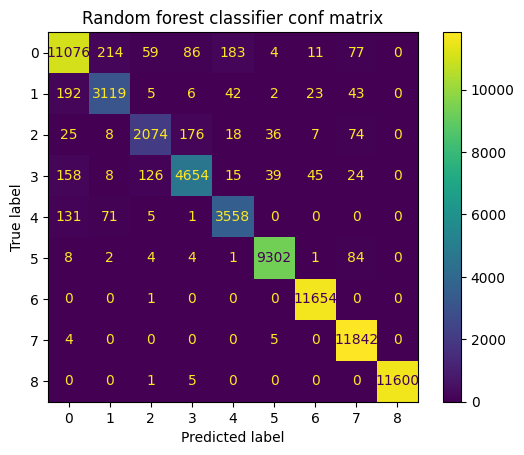

In [45]:
y_preds = forest_reg.predict(X_val)
accuracy = accuracy_score(y_val,y_preds)
recall = recall_score(y_val,y_preds,average="weighted")
precision = precision_score(y_val,y_preds,average="weighted")
f1 = f1_score(y_val,y_preds,average="weighted")
model_performance.loc["RF edited 2"] = [accuracy,recall,precision,f1]
evaluate_model(y_val, y_preds,'Random forest classifier conf matrix')

In [46]:
forest_reg = RandomForestClassifier( max_depth=20, n_estimators=50)
forest_reg.fit(X_train, y_train)
score_randomforest = forest_reg.score(X_val,y_val)
print('Random forest classifier Accuracy score (training)',forest_reg.score(X_train,y_train))
print('Random forest classifier Accuracy score (test) ',forest_reg.score(X_val,y_val))

Random forest classifier Accuracy score (training) 0.9813256431318769
Random forest classifier Accuracy score (test)  0.9634763724563902


              precision    recall  f1-score   support

           0       0.93      0.95      0.94     11710
           1       0.89      0.86      0.87      3432
           2       0.90      0.82      0.86      2418
           3       0.94      0.89      0.92      5069
           4       0.92      0.91      0.91      3766
           5       0.99      0.99      0.99      9406
           6       0.99      1.00      1.00     11655
           7       0.97      1.00      0.98     11851
           8       1.00      1.00      1.00     11606

    accuracy                           0.96     70913
   macro avg       0.95      0.93      0.94     70913
weighted avg       0.96      0.96      0.96     70913



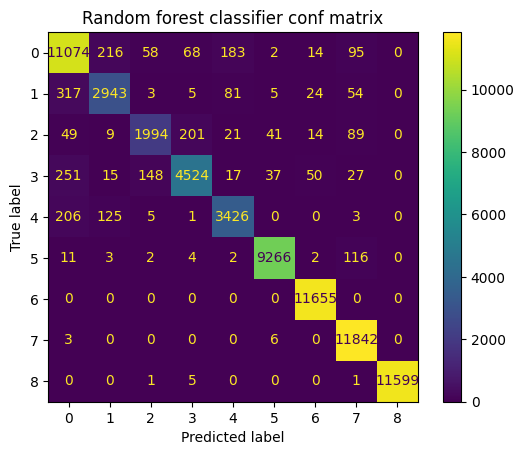

In [47]:
y_preds = forest_reg.predict(X_val)
accuracy = accuracy_score(y_val,y_preds)
recall = recall_score(y_val,y_preds,average="weighted")
precision = precision_score(y_val,y_preds,average="weighted")
f1 = f1_score(y_val,y_preds,average="weighted")
model_performance.loc["RF edited 3"] = [accuracy,recall,precision,f1]
evaluate_model(y_val, y_preds,'Random forest classifier conf matrix')

In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

# Example model
model = RandomForestClassifier(class_weight='balanced', random_state=21)

# Cross-validation
cv_scores = cross_val_score(model, X_resampled, y_resampled, cv=5, scoring='f1_macro')
print(f'Cross-validated F1 scores: {cv_scores}')

# Train and evaluate
model.fit(X_train, y_train)
y_pred = model.predict(X_val)


Cross-validated F1 scores: [0.96116846 0.96470837 0.96460498 0.96069422 0.95566409]


              precision    recall  f1-score   support

           0       0.93      0.95      0.94     11710
           1       0.89      0.86      0.87      3432
           2       0.90      0.82      0.86      2418
           3       0.94      0.89      0.92      5069
           4       0.92      0.91      0.91      3766
           5       0.99      0.99      0.99      9406
           6       0.99      1.00      1.00     11655
           7       0.97      1.00      0.98     11851
           8       1.00      1.00      1.00     11606

    accuracy                           0.96     70913
   macro avg       0.95      0.93      0.94     70913
weighted avg       0.96      0.96      0.96     70913



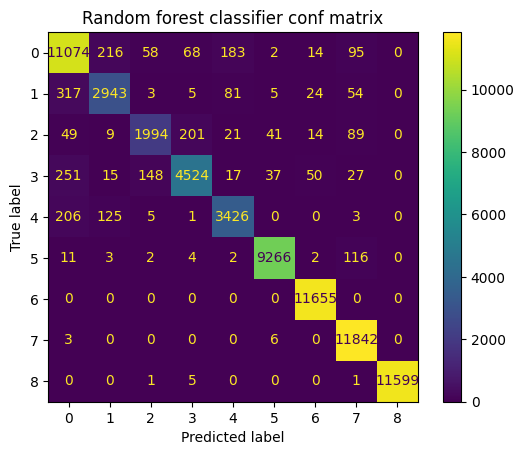

In [49]:
y_preds = forest_reg.predict(X_val)
accuracy = accuracy_score(y_val,y_preds)
recall = recall_score(y_val,y_preds,average="weighted")
precision = precision_score(y_val,y_preds,average="weighted")
f1 = f1_score(y_val,y_preds,average="weighted")
model_performance.loc["RF edited 4"] = [accuracy,recall,precision,f1]
evaluate_model(y_val, y_preds,'Random forest classifier conf matrix')

### Random forest Conclusion
The random forest models had the best results realtive to all classification measurments.

## KNN

In [50]:
from sklearn.neighbors import KNeighborsClassifier

In [51]:
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train, y_train)
score_knn = knn.score(X_val,y_val)
print('The accuracy of the K-nearest neighbors Model is',score_knn)

The accuracy of the K-nearest neighbors Model is 0.9218478981286929


              precision    recall  f1-score   support

           0       0.87      0.85      0.86     11710
           1       0.77      0.80      0.78      3432
           2       0.82      0.69      0.75      2418
           3       0.89      0.83      0.86      5069
           4       0.84      0.86      0.85      3766
           5       0.95      0.90      0.92      9406
           6       0.97      1.00      0.99     11655
           7       0.92      0.99      0.96     11851
           8       1.00      1.00      1.00     11606

    accuracy                           0.92     70913
   macro avg       0.89      0.88      0.89     70913
weighted avg       0.92      0.92      0.92     70913



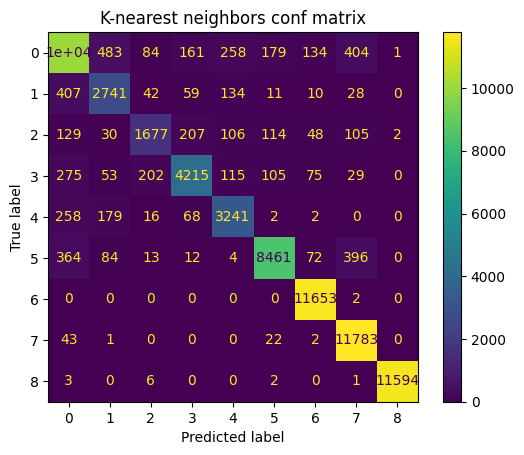

In [52]:
y_preds = knn.predict(X_val)
accuracy = accuracy_score(y_val,y_preds)
recall = recall_score(y_val,y_preds,average="weighted")
precision = precision_score(y_val,y_preds,average="weighted")
f1 = f1_score(y_val,y_preds,average="weighted")
model_performance.loc["KNN"] = [accuracy,recall,precision,f1]
evaluate_model(y_val, y_preds,'K-nearest neighbors conf matrix')

In [53]:
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(X_train, y_train)
score_knn = knn.score(X_val,y_val)
print('The accuracy of the K-nearest neighbors Model is',score_knn)

The accuracy of the K-nearest neighbors Model is 0.8603641081325004


              precision    recall  f1-score   support

           0       0.80      0.73      0.76     11710
           1       0.62      0.65      0.64      3432
           2       0.67      0.43      0.52      2418
           3       0.87      0.74      0.80      5069
           4       0.75      0.80      0.77      3766
           5       0.92      0.82      0.86      9406
           6       0.91      1.00      0.95     11655
           7       0.82      0.98      0.89     11851
           8       1.00      1.00      1.00     11606

    accuracy                           0.86     70913
   macro avg       0.82      0.79      0.80     70913
weighted avg       0.86      0.86      0.86     70913



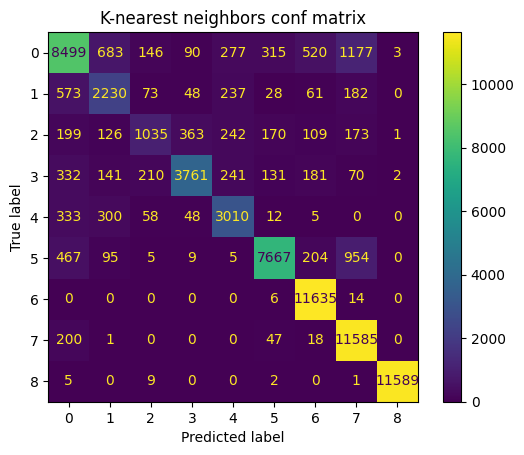

In [54]:
y_preds = knn.predict(X_val)
accuracy = accuracy_score(y_val,y_preds)
recall = recall_score(y_val,y_preds,average="weighted")
precision = precision_score(y_val,y_preds,average="weighted")
f1 = f1_score(y_val,y_preds,average="weighted")
model_performance.loc["KNN edited 1"] = [accuracy,recall,precision,f1]
evaluate_model(y_val, y_preds,'K-nearest neighbors conf matrix')

In [55]:
knn = KNeighborsClassifier(n_neighbors=75)
knn.fit(X_train, y_train)
score_knn = knn.score(X_val,y_val)
print('The accuracy of the K-nearest neighbors Model is',score_knn)

The accuracy of the K-nearest neighbors Model is 0.8382948119526744


              precision    recall  f1-score   support

           0       0.77      0.68      0.73     11710
           1       0.57      0.58      0.57      3432
           2       0.66      0.34      0.45      2418
           3       0.87      0.73      0.79      5069
           4       0.72      0.77      0.75      3766
           5       0.90      0.79      0.84      9406
           6       0.89      1.00      0.94     11655
           7       0.78      0.96      0.86     11851
           8       1.00      1.00      1.00     11606

    accuracy                           0.84     70913
   macro avg       0.79      0.76      0.77     70913
weighted avg       0.84      0.84      0.83     70913



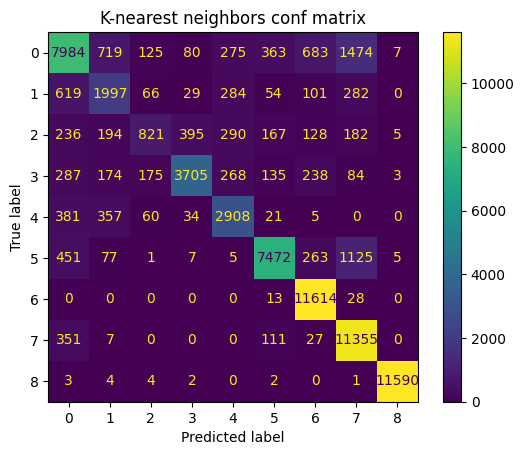

In [56]:
y_preds = knn.predict(X_val)
accuracy = accuracy_score(y_val,y_preds)
recall = recall_score(y_val,y_preds,average="weighted")
precision = precision_score(y_val,y_preds,average="weighted")
f1 = f1_score(y_val,y_preds,average="weighted")
model_performance.loc["KNN edited 2"] = [accuracy,recall,precision,f1]
evaluate_model(y_val, y_preds,'K-nearest neighbors conf matrix')

### KNN Conclusion
KNN could not be improved further and since it is a non-parametric algorithm no further hyperparameter tuning is possible

## Logistic Regression

In [57]:
from sklearn.linear_model import LogisticRegression

In [58]:
log_clf = LogisticRegression(solver='liblinear', penalty='l2', C=5.0)
log_clf.fit(X_train,y_train)
print('Accuracy of Logistic regression classifier on train set:' , log_clf.score(X_train, y_train))
print('Accuracy of Logistic regression classifier on test set:' , log_clf.score(X_val, y_val))

Accuracy of Logistic regression classifier on train set: 0.7111344574847259
Accuracy of Logistic regression classifier on test set: 0.7100249601624525


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.45      0.39      0.42     11710
           1       0.42      0.19      0.26      3432
           2       0.60      0.04      0.07      2418
           3       0.79      0.73      0.75      5069
           4       0.75      0.69      0.72      3766
           5       0.77      0.74      0.76      9406
           6       0.76      0.88      0.82     11655
           7       0.61      0.84      0.71     11851
           8       0.98      0.99      0.98     11606

    accuracy                           0.71     70913
   macro avg       0.68      0.61      0.61     70913
weighted avg       0.70      0.71      0.69     70913



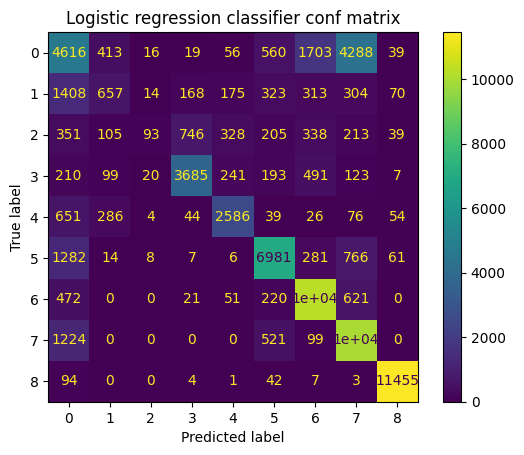

In [59]:
y_preds = log_clf.predict(X_val)
accuracy = accuracy_score(y_val,y_preds)
recall = recall_score(y_val,y_preds,average="weighted")
precision = precision_score(y_val,y_preds,average="weighted")
f1 = f1_score(y_val,y_preds,average="weighted")
model_performance.loc["LR"] = [accuracy,recall,precision,f1]
evaluate_model(y_val, y_preds,'Logistic regression classifier conf matrix')

In [60]:
log_clf = LogisticRegression(solver='liblinear', penalty='l2', C=15.0)
log_clf.fit(X_train,y_train)
print('Accuracy of Logistic regression classifier on train set:' , log_clf.score(X_train, y_train))
print('Accuracy of Logistic regression classifier on test set:' , log_clf.score(X_val, y_val))

Accuracy of Logistic regression classifier on train set: 0.704904971249881
Accuracy of Logistic regression classifier on test set: 0.7043278383371173


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.43      0.36      0.39     11710
           1       0.42      0.18      0.25      3432
           2       0.62      0.04      0.07      2418
           3       0.78      0.73      0.75      5069
           4       0.75      0.69      0.72      3766
           5       0.76      0.74      0.75      9406
           6       0.76      0.88      0.82     11655
           7       0.60      0.85      0.70     11851
           8       0.97      0.99      0.98     11606

    accuracy                           0.70     70913
   macro avg       0.68      0.61      0.60     70913
weighted avg       0.69      0.70      0.68     70913



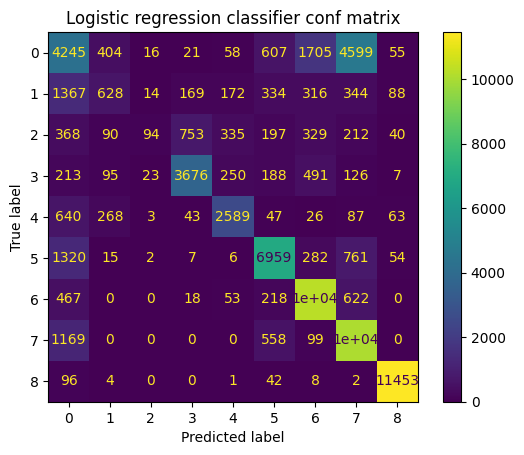

In [61]:
y_preds = log_clf.predict(X_val)
accuracy = accuracy_score(y_val,y_preds)
recall = recall_score(y_val,y_preds,average="weighted")
precision = precision_score(y_val,y_preds,average="weighted")
f1 = f1_score(y_val,y_preds,average="weighted")
model_performance.loc["LR edited 1"] = [accuracy,recall,precision,f1]
evaluate_model(y_val, y_preds,'Logistic regression classifier conf matrix')

In [62]:
log_clf = LogisticRegression(solver='liblinear', penalty='l2', C=30.0)
log_clf.fit(X_train,y_train)
print('Accuracy of Logistic regression classifier on train set:' , log_clf.score(X_train, y_train))
print('Accuracy of Logistic regression classifier on test set:' , log_clf.score(X_val, y_val))

Accuracy of Logistic regression classifier on train set: 0.7182629357908134
Accuracy of Logistic regression classifier on test set: 0.7174001946046564


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
y_preds = log_clf.predict(X_val)
accuracy = accuracy_score(y_val,y_preds)
recall = recall_score(y_val,y_preds,average="weighted")
precision = precision_score(y_val,y_preds,average="weighted")
f1 = f1_score(y_val,y_preds,average="weighted")
model_performance.loc["LR edited 2"] = [accuracy,recall,precision,f1]
evaluate_model(y_val, y_preds,'Logistic regression classifier conf matrix')

### Logistic Regression Conclusion

In all experiments the logistic regression models failed to converge meaning that they could yield better reults if given more iterations however since they  were always biased towards classes with higher samples it's diffuclt to have them give a good precision score


# Overall Conclution

Out of all the models tested, the random forest classifier emerged victorious. It achieved this with a hyperparameter configuration of max_depth set to 25 and n_estimators set to 50. The key factor in its success was maximizing precision. Precision focuses on reducing false positives, which are mistakes where normal traffic gets flagged as an attack. In this particular case, avoiding these false alarms is crucial.

In [64]:
model_performance.style.background_gradient(cmap='coolwarm').format({'Accuracy': '{:.2%}',
                                                                     'Precision': '{:.2%}',
                                                                     'Recall': '{:.2%}',
                                                                     'F1-Score': '{:.2%}',
                                                                     })